## 1. Import Libraries

Muhammad Ghaniyu Haq Haryanto


## 2. Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text processing
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
from collections import Counter

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# TensorFlow import dengan error handling untuk MPS
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import warnings
warnings.filterwarnings('ignore')

# Settings
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 3. Load Dataset

In [2]:
df = pd.read_csv('/Users/h3h3/Desktop/Ngoding/Kuliah/Tugas Project/dataset.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset loaded successfully!
Shape: (40607, 9)

Columns: ['Unnamed: 0', 'text', 'rating', 'category', 'product_name', 'product_id', 'sold', 'shop_id', 'product_url']


## 4. Initial Data Exploration

In [3]:
df.head()

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,1,Barang sesuai pesanan dan cepat sampai,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - Staples Gun 4-8 mm C Mart,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staples-dekorasi-staples-kayu-refill-8mm-staples-gun-4-8...
1,2,Barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMBAK HEKTER 022708,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/staple-gun-ats-3-way-tacker-staples-jok-tembak-hekter-...
2,3,Paket rapi...mantap....cepat....sampe ke tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMBAK HEKTER 022708,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/staple-gun-ats-3-way-tacker-staples-jok-tembak-hekter-...
3,4,ya saya puas dgn barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; OSSEL 1022J,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-staples-tembak-air-nailer-gun-ossel-1022j
4,5,Responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gun Max t3-10 mb MAX,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-refill-staples-jok-kulit-motor-staple-gun-max-t3-10-m...


In [4]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40607 entries, 0 to 40606
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    40607 non-null  int64 
 1   text          40607 non-null  object
 2   rating        40607 non-null  int64 
 3   category      40607 non-null  object
 4   product_name  40607 non-null  object
 5   product_id    40607 non-null  int64 
 6   sold          40593 non-null  object
 7   shop_id       40607 non-null  int64 
 8   product_url   40607 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.8+ MB


In [5]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Unnamed: 0,rating,product_id,shop_id
count,40607.000000,40607.000000,4.060700e+04,4.060700e+04
mean,20443.690103,4.642574,1.985060e+08,1.342409e+06
std,11810.534919,0.732448,1.284990e+08,1.028990e+06
min,1.000000,1.000000,1.505048e+06,1.563000e+03
25%,10225.500000,4.000000,1.052222e+08,1.625610e+05
50%,20427.000000,5.000000,1.829377e+08,1.787060e+06
75%,30680.500000,5.000000,2.889640e+08,2.048686e+06
max,40893.000000,5.000000,5.028693e+08,5.359950e+06


In [6]:
print("Missing Values:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing.sum() == 0:
    print("\n✅ No missing values found!")
else:
    print(f"\n⚠️ Total missing values: {missing.sum()}")

Missing Values:
      Missing Count  Percentage
sold             14    0.034477

⚠️ Total missing values: 14


In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"\n⚠️ Found {duplicates} duplicate rows")
    print("Removing duplicates...")
    df = df.drop_duplicates()
    print(f"✅ Duplicates removed. New shape: {df.shape}")
else:
    print("\n✅ No duplicate rows found!")

Duplicate rows: 0

✅ No duplicate rows found!


## 5. Rating Distribution Analysis (CRITICAL for Class Imbalance)

In [8]:
print("Rating Distribution:")
rating_counts = df['rating'].value_counts().sort_index()
rating_percent = (rating_counts / len(df)) * 100

rating_dist = pd.DataFrame({
    'Count': rating_counts,
    'Percentage': rating_percent
})
print(rating_dist)
print(f"\nTotal reviews: {len(df)}")

Rating Distribution:
        Count  Percentage
rating                   
1         543    1.337208
2         382    0.940725
3        1825    4.494299
4        7546   18.583003
5       30311   74.644766

Total reviews: 40607


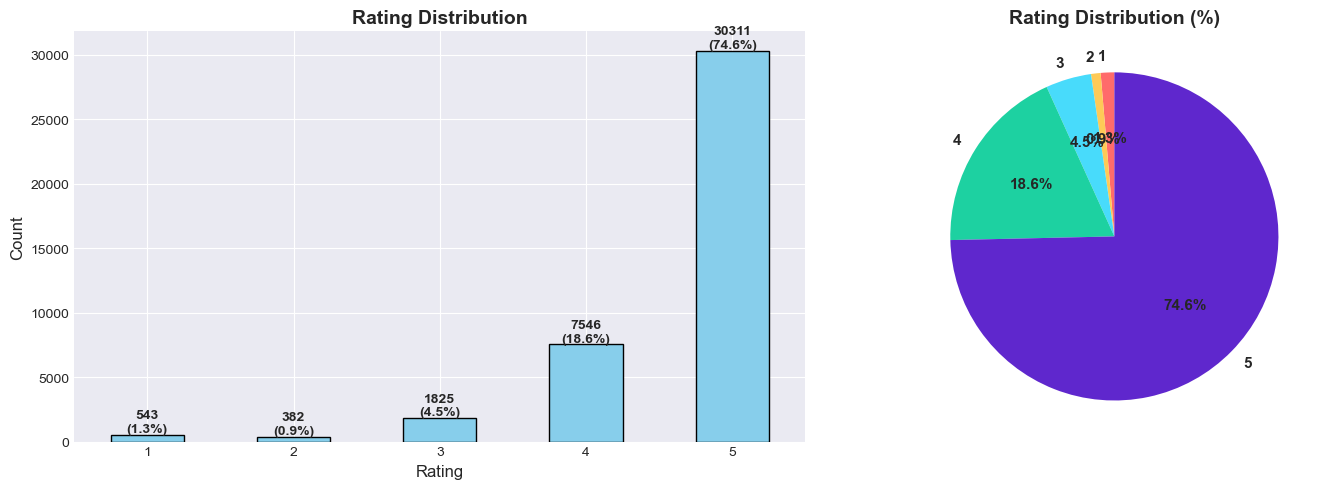


📊 Insight: Rating 5 has the highest frequency (30311 reviews, 74.6%)


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax1 = axes[0]
rating_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Rating Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Rating', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

for i, v in enumerate(rating_counts):
    ax1.text(i, v + 200, f'{v}\n({rating_percent.iloc[i]:.1f}%)', 
             ha='center', fontweight='bold')

ax2 = axes[1]
colors = ['#ff6b6b', '#feca57', '#48dbfb', '#1dd1a1', '#5f27cd']
ax2.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Rating Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Insight: Rating {rating_counts.idxmax()} has the highest frequency ({rating_counts.max()} reviews, {rating_percent.max():.1f}%)")

## 6. Binary Sentiment Labeling

In [10]:
print("Original dataset shape:", df.shape)

def label_sentiment(rating):
    if rating <= 2:
        return 0  # Negative
    elif rating >= 4:
        return 1  # Positive
    else:
        return -1  # Neutral (will be excluded)

df['sentiment'] = df['rating'].apply(label_sentiment)

print("\nSentiment distribution (before filtering neutral):")
print(df['sentiment'].value_counts().sort_index())

df_binary = df[df['sentiment'] != -1].copy()

print(f"\nDataset after excluding neutral reviews: {df_binary.shape}")
print(f"Reviews removed (rating 3): {len(df) - len(df_binary)}")

df_binary.reset_index(drop=True, inplace=True)

Original dataset shape: (40607, 9)

Sentiment distribution (before filtering neutral):
sentiment
-1     1825
 0      925
 1    37857
Name: count, dtype: int64

Dataset after excluding neutral reviews: (38782, 10)
Reviews removed (rating 3): 1825


## 7. Class Imbalance Analysis ⚠️ CRITICAL

In [11]:
sentiment_counts = df_binary['sentiment'].value_counts()
sentiment_percent = (sentiment_counts / len(df_binary)) * 100

print("="*60)
print("CLASS DISTRIBUTION ANALYSIS")
print("="*60)

class_dist = pd.DataFrame({
    'Sentiment': ['Negative (0)', 'Positive (1)'],
    'Count': [sentiment_counts[0], sentiment_counts[1]],
    'Percentage': [sentiment_percent[0], sentiment_percent[1]]
})
print(class_dist.to_string(index=False))

majority_class = sentiment_counts.max()
minority_class = sentiment_counts.min()
imbalance_ratio = majority_class / minority_class

print(f"\n📊 Imbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"   (Majority class is {imbalance_ratio:.2f}x larger than minority class)")

if imbalance_ratio < 1.5:
    severity = "✅ Balanced (No special handling needed)"
elif imbalance_ratio < 3:
    severity = "⚠️ Slightly Imbalanced (Consider class weights)"
elif imbalance_ratio < 5:
    severity = "⚠️ Moderately Imbalanced (Use class weights)"
elif imbalance_ratio < 10:
    severity = "🚨 Highly Imbalanced (Use class weights + sampling)"
else:
    severity = "🚨 Severely Imbalanced (Multiple techniques needed)"

print(f"\n{severity}")
print("="*60)

CLASS DISTRIBUTION ANALYSIS
   Sentiment  Count  Percentage
Negative (0)    925    2.385127
Positive (1)  37857   97.614873

📊 Imbalance Ratio: 40.93:1
   (Majority class is 40.93x larger than minority class)

🚨 Severely Imbalanced (Multiple techniques needed)


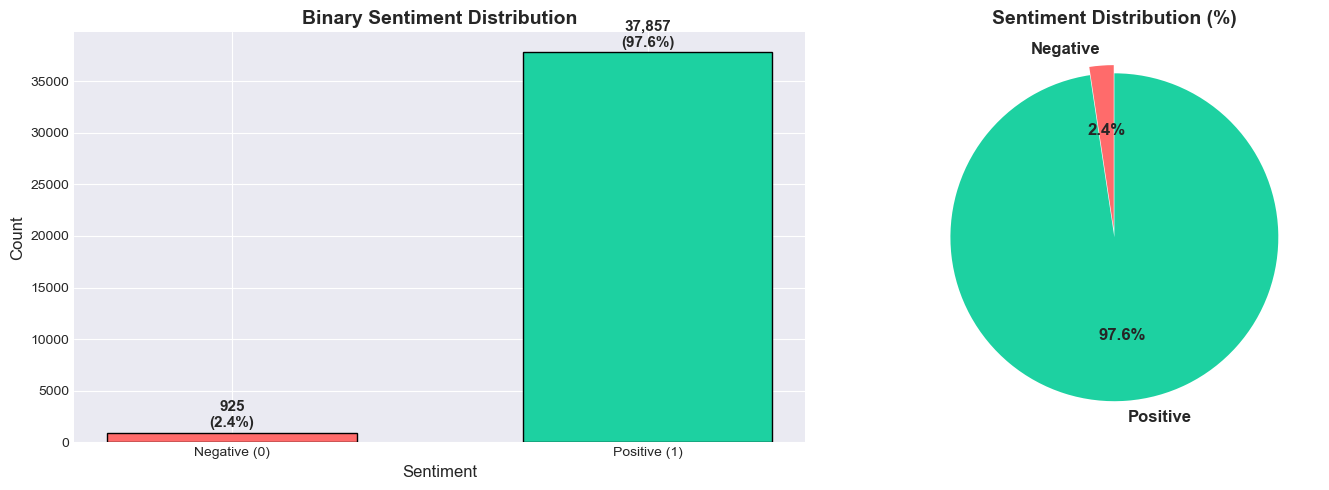


⚠️ WARNING: Dataset is imbalanced with ratio 40.93:1
   Negative (0): 925 samples (2.4%)
   Positive (1): 37,857 samples (97.6%)
   This will be handled using class balancing techniques.


In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax1 = axes[0]
colors_sentiment = ['#ff6b6b', '#1dd1a1']

labels = ['Negative (0)', 'Positive (1)']
counts = [sentiment_counts[0], sentiment_counts[1]]  # 0 = Negative, 1 = Positive
percentages = [sentiment_percent[0], sentiment_percent[1]]

bars = ax1.bar(labels, counts, color=colors_sentiment, edgecolor='black', width=0.6)
ax1.set_title('Binary Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

for i, (bar, count, pct) in enumerate(zip(bars, counts, percentages)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 500,
            f'{count:,}\n({pct:.1f}%)',
            ha='center', fontweight='bold', fontsize=11)

ax2 = axes[1]
pie_data = [sentiment_counts[0], sentiment_counts[1]]
pie_labels = ['Negative', 'Positive']

ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%',
        startangle=90, colors=colors_sentiment, explode=(0.05, 0),
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Sentiment Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n⚠️ WARNING: Dataset is imbalanced with ratio {imbalance_ratio:.2f}:1")
print(f"   Negative (0): {sentiment_counts[0]:,} samples ({sentiment_percent[0]:.1f}%)")
print(f"   Positive (1): {sentiment_counts[1]:,} samples ({sentiment_percent[1]:.1f}%)")
print("   This will be handled using class balancing techniques.")

## 8. Text Length Analysis

In [13]:
df_binary['text_length_char'] = df_binary['text'].astype(str).apply(len)
df_binary['text_length_words'] = df_binary['text'].astype(str).apply(lambda x: len(x.split()))

print("Text Length Statistics:")
print("\nCharacter Length:")
print(df_binary['text_length_char'].describe())

print("\nWord Count:")
print(df_binary['text_length_words'].describe())

Text Length Statistics:

Character Length:
count    38782.000000
mean        54.715177
std         43.268103
min          5.000000
25%         32.000000
50%         43.000000
75%         62.000000
max       1274.000000
Name: text_length_char, dtype: float64

Word Count:
count    38782.000000
mean         7.822804
std          6.977714
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max        208.000000
Name: text_length_words, dtype: float64


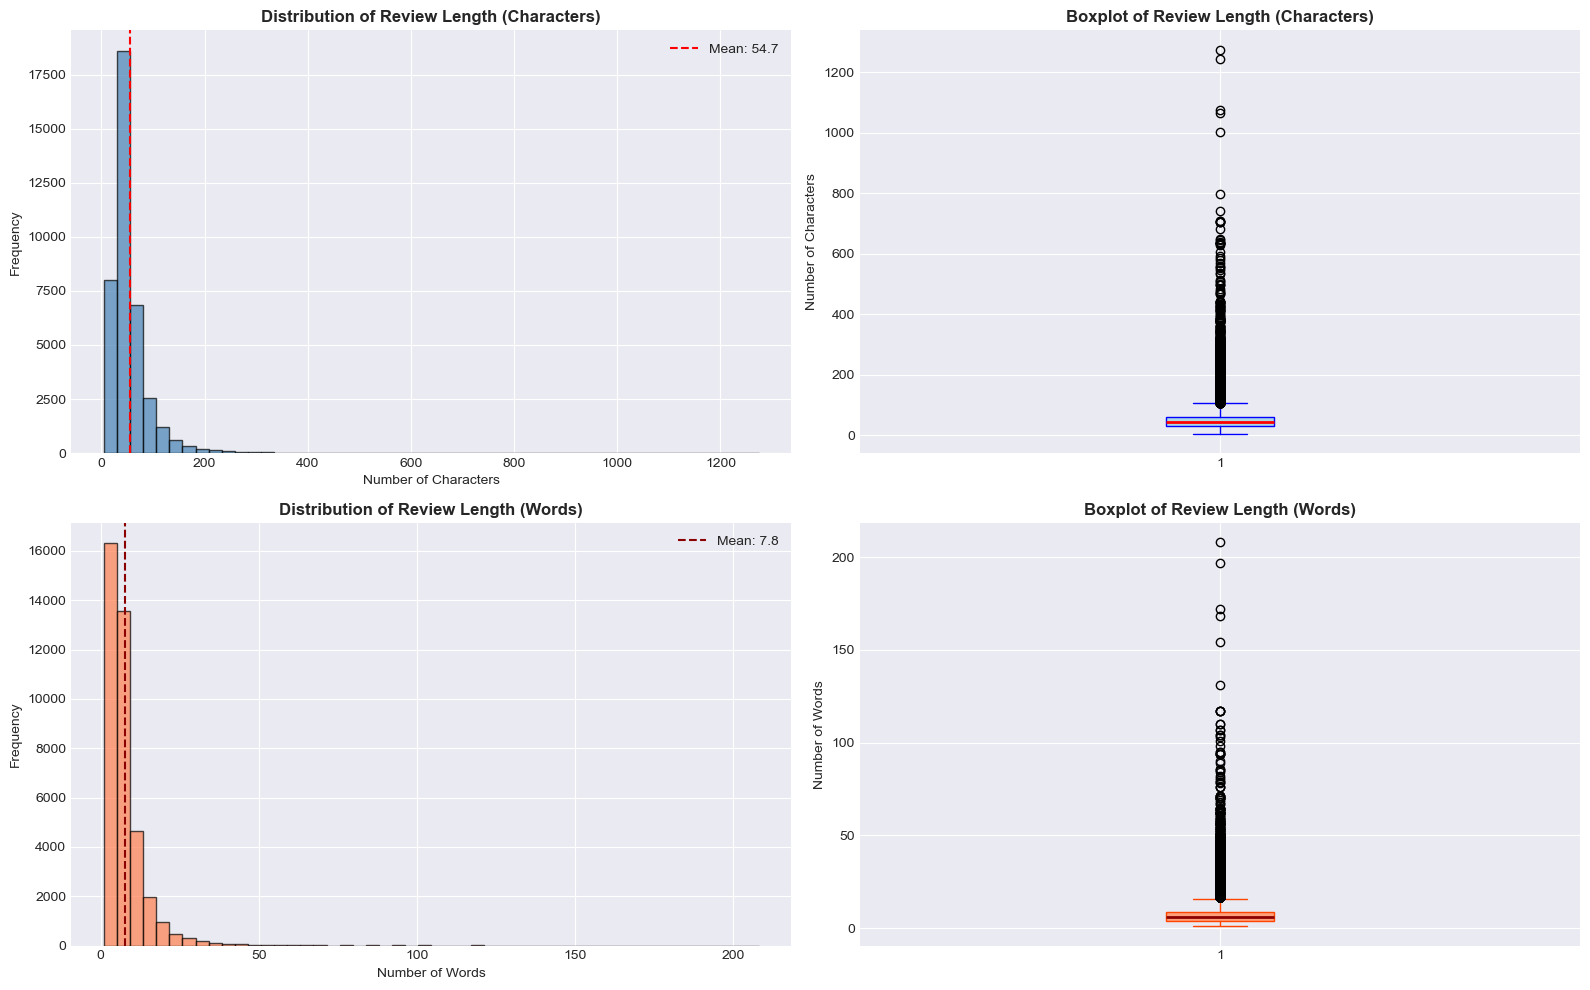


Outlier Detection:
Very short reviews (<3 words): 2948 (7.60%)
Very long reviews (>100 words): 18 (0.05%)


In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

ax1 = axes[0, 0]
ax1.hist(df_binary['text_length_char'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_title('Distribution of Review Length (Characters)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Number of Characters', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)
ax1.axvline(df_binary['text_length_char'].mean(), color='red', linestyle='--', 
            label=f"Mean: {df_binary['text_length_char'].mean():.1f}")
ax1.legend()

ax2 = axes[0, 1]
ax2.boxplot(df_binary['text_length_char'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red', linewidth=2))
ax2.set_title('Boxplot of Review Length (Characters)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Characters', fontsize=10)

ax3 = axes[1, 0]
ax3.hist(df_binary['text_length_words'], bins=50, color='coral', edgecolor='black', alpha=0.7)
ax3.set_title('Distribution of Review Length (Words)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Number of Words', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.axvline(df_binary['text_length_words'].mean(), color='darkred', linestyle='--',
            label=f"Mean: {df_binary['text_length_words'].mean():.1f}")
ax3.legend()

ax4 = axes[1, 1]
ax4.boxplot(df_binary['text_length_words'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightsalmon', color='orangered'),
            whiskerprops=dict(color='orangered'),
            capprops=dict(color='orangered'),
            medianprops=dict(color='darkred', linewidth=2))
ax4.set_title('Boxplot of Review Length (Words)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Number of Words', fontsize=10)

plt.tight_layout()
plt.show()

print("\nOutlier Detection:")
very_short = df_binary[df_binary['text_length_words'] < 3]
very_long = df_binary[df_binary['text_length_words'] > 100]
print(f"Very short reviews (<3 words): {len(very_short)} ({len(very_short)/len(df_binary)*100:.2f}%)")
print(f"Very long reviews (>100 words): {len(very_long)} ({len(very_long)/len(df_binary)*100:.2f}%)")

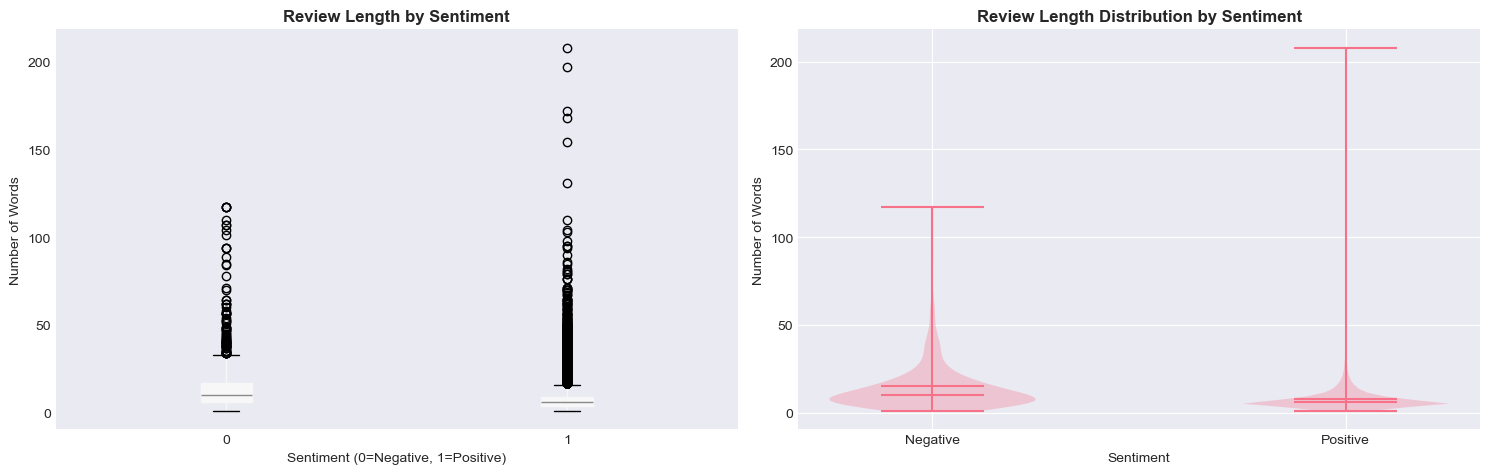


Text Length Statistics by Sentiment:
             count       mean        std  min  25%   50%   75%    max
sentiment                                                            
0            925.0  15.041081  16.171512  1.0  6.0  10.0  17.0  117.0
1          37857.0   7.646433   6.495440  1.0  4.0   6.0   9.0  208.0


In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax1 = axes[0]
df_binary.boxplot(column='text_length_words', by='sentiment', ax=ax1,
                  patch_artist=True, grid=False)
ax1.set_title('Review Length by Sentiment', fontsize=12, fontweight='bold')
ax1.set_xlabel('Sentiment (0=Negative, 1=Positive)', fontsize=10)
ax1.set_ylabel('Number of Words', fontsize=10)
plt.suptitle('')

ax2 = axes[1]
parts = ax2.violinplot([df_binary[df_binary['sentiment']==0]['text_length_words'],
                        df_binary[df_binary['sentiment']==1]['text_length_words']],
                       positions=[0, 1], showmeans=True, showmedians=True)
ax2.set_title('Review Length Distribution by Sentiment', fontsize=12, fontweight='bold')
ax2.set_xlabel('Sentiment', fontsize=10)
ax2.set_ylabel('Number of Words', fontsize=10)
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Negative', 'Positive'])

plt.tight_layout()
plt.show()

print("\nText Length Statistics by Sentiment:")
print(df_binary.groupby('sentiment')['text_length_words'].describe())

## 9. Category Analysis

In [16]:
print("Reviews per Category:")
category_counts = df_binary['category'].value_counts()
category_percent = (category_counts / len(df_binary)) * 100

category_dist = pd.DataFrame({
    'Count': category_counts,
    'Percentage': category_percent
})
print(category_dist)

Reviews per Category:
             Count  Percentage
category                      
elektronik   15493   39.948945
fashion       8536   22.010211
olahraga      7358   18.972719
handphone     5645   14.555722
pertukangan   1750    4.512403


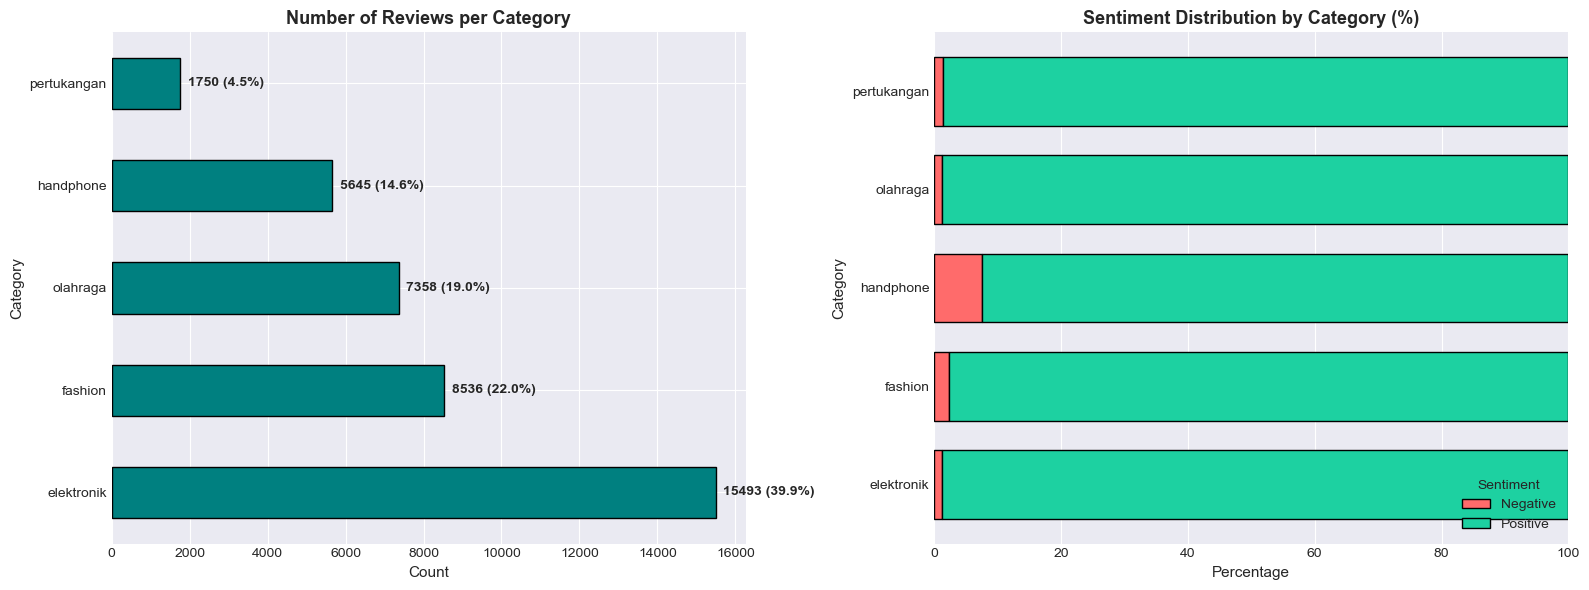

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
category_counts.plot(kind='barh', ax=ax1, color='teal', edgecolor='black')
ax1.set_title('Number of Reviews per Category', fontsize=13, fontweight='bold')
ax1.set_xlabel('Count', fontsize=11)
ax1.set_ylabel('Category', fontsize=11)

for i, v in enumerate(category_counts):
    ax1.text(v + 200, i, f'{v} ({category_percent.iloc[i]:.1f}%)', 
             va='center', fontweight='bold')

ax2 = axes[1]
sentiment_by_cat = pd.crosstab(df_binary['category'], df_binary['sentiment'], normalize='index') * 100
sentiment_by_cat.plot(kind='barh', stacked=True, ax=ax2, 
                      color=['#ff6b6b', '#1dd1a1'],
                      edgecolor='black', width=0.7)
ax2.set_title('Sentiment Distribution by Category (%)', fontsize=13, fontweight='bold')
ax2.set_xlabel('Percentage', fontsize=11)
ax2.set_ylabel('Category', fontsize=11)
ax2.legend(['Negative', 'Positive'], title='Sentiment', loc='lower right')
ax2.set_xlim(0, 100)

plt.tight_layout()
plt.show()

In [18]:

print("\nSentiment Distribution by Category:")
sentiment_category = pd.crosstab(df_binary['category'], df_binary['sentiment'], margins=True)
sentiment_category.columns = ['Negative', 'Positive', 'Total']
print(sentiment_category)

print("\nSentiment Percentage by Category:")
sentiment_category_pct = pd.crosstab(df_binary['category'], df_binary['sentiment'], 
                                     normalize='index') * 100
sentiment_category_pct.columns = ['Negative (%)', 'Positive (%)']
print(sentiment_category_pct.round(2))


Sentiment Distribution by Category:
             Negative  Positive  Total
category                              
elektronik        188     15305  15493
fashion           193      8343   8536
handphone         425      5220   5645
olahraga           95      7263   7358
pertukangan        24      1726   1750
All               925     37857  38782

Sentiment Percentage by Category:
             Negative (%)  Positive (%)
category                               
elektronik           1.21         98.79
fashion              2.26         97.74
handphone            7.53         92.47
olahraga             1.29         98.71
pertukangan          1.37         98.63


## 10. Text Preprocessing Functions

In [19]:
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()

factory_stopword = StopWordRemoverFactory()
stopword_remover = factory_stopword.create_stop_word_remover()

print("✅ Indonesian NLP tools initialized!")

✅ Indonesian NLP tools initialized!


In [20]:
def clean_text(text):
    """
    Clean and preprocess Indonesian text
    """
    text = str(text).lower()
    
    #URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    #mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    #emails
    text = re.sub(r'\S+@\S+', '', text)
    
    #punctuation but keep Indonesian characters
    text = re.sub(r'[^\w\s]', ' ', text)
    
    #extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def preprocess_text(text, remove_stopwords=False, apply_stemming=False):
    """
    Advanced preprocessing with optional stopword removal and stemming
    """
    text = clean_text(text)
    
    if remove_stopwords:
        text = stopword_remover.remove(text)
    
    if apply_stemming:
        text = stemmer.stem(text)
    
    return text

print("✅ Text preprocessing functions defined!")

sample_text = "Barang sangat bagus!!! Pengiriman cepat & aman. Recommended 👍 https://tokopedia.com"
print(f"\nOriginal: {sample_text}")
print(f"Cleaned: {clean_text(sample_text)}")
print(f"With stopword removal: {preprocess_text(sample_text, remove_stopwords=True)}")
print(f"With stemming: {preprocess_text(sample_text, remove_stopwords=True, apply_stemming=True)}")

✅ Text preprocessing functions defined!

Original: Barang sangat bagus!!! Pengiriman cepat & aman. Recommended 👍 https://tokopedia.com
Cleaned: barang sangat bagus pengiriman cepat aman recommended
With stopword removal: barang sangat bagus pengiriman cepat aman recommended
With stemming: barang sangat bagus kirim cepat aman recommended


## 11. Apply Text Preprocessing

In [21]:
print("Preprocessing reviews...")
print("This may take a few minutes...\n")

df_binary['text_cleaned'] = df_binary['text'].apply(clean_text)
df_binary['text_preprocessed'] = df_binary['text'].apply(lambda x: preprocess_text(x, remove_stopwords=False))

print("✅ Text preprocessing completed!")

print("\nSample preprocessed reviews:")
for i in range(3):
    print(f"\n{i+1}. Original: {df_binary['text'].iloc[i]}")
    print(f"   Cleaned: {df_binary['text_cleaned'].iloc[i]}")
    print(f"   Sentiment: {'Positive' if df_binary['sentiment'].iloc[i]==1 else 'Negative'}")

Preprocessing reviews...
This may take a few minutes...

✅ Text preprocessing completed!

Sample preprocessed reviews:

1. Original: Barang sesuai pesanan dan cepat sampai
   Cleaned: barang sesuai pesanan dan cepat sampai
   Sentiment: Positive

2. Original: Barang bagus harga murah
   Cleaned: barang bagus harga murah
   Sentiment: Positive

3. Original: Paket rapi...mantap....cepat....sampe ke tujuan
   Cleaned: paket rapi mantap cepat sampe ke tujuan
   Sentiment: Positive


In [22]:
print(f"Dataset size before filtering: {len(df_binary)}")

df_binary['word_count'] = df_binary['text_cleaned'].apply(lambda x: len(x.split()))
df_binary = df_binary[df_binary['word_count'] >= 3].copy()

print(f"Dataset size after filtering (>= 3 words): {len(df_binary)}")
print(f"Reviews removed: {len(df) - len(df_binary)}")

df_binary.reset_index(drop=True, inplace=True)

print("\n✅ Filtering completed!")

Dataset size before filtering: 38782
Dataset size after filtering (>= 3 words): 35833
Reviews removed: 4774

✅ Filtering completed!


## 12. Word Frequency Analysis

In [23]:
positive_words = ' '.join(df_binary[df_binary['sentiment']==1]['text_cleaned']).split()
negative_words = ' '.join(df_binary[df_binary['sentiment']==0]['text_cleaned']).split()
all_words = ' '.join(df_binary['text_cleaned']).split()

print(f"Total words in dataset: {len(all_words):,}")
print(f"Words in positive reviews: {len(positive_words):,}")
print(f"Words in negative reviews: {len(negative_words):,}")
print(f"Unique words (vocabulary): {len(set(all_words)):,}")

Total words in dataset: 301,837
Words in positive reviews: 287,862
Words in negative reviews: 13,975
Unique words (vocabulary): 13,555


Top 20 Most Common Words (Overall):
      Word  Frequency
    barang      15103
    sesuai      11038
     cepat       8690
       dan       7864
     bagus       7287
    dengan       5466
     sudah       5416
      baik       4437
    sampai       4427
pengiriman       4381
    terima       3979
    respon       3782
       gan       3643
     kasih       3184
        di       3162
   pesanan       3057
    produk       2997
    seller       2903
  diterima       2779
    mantap       2774


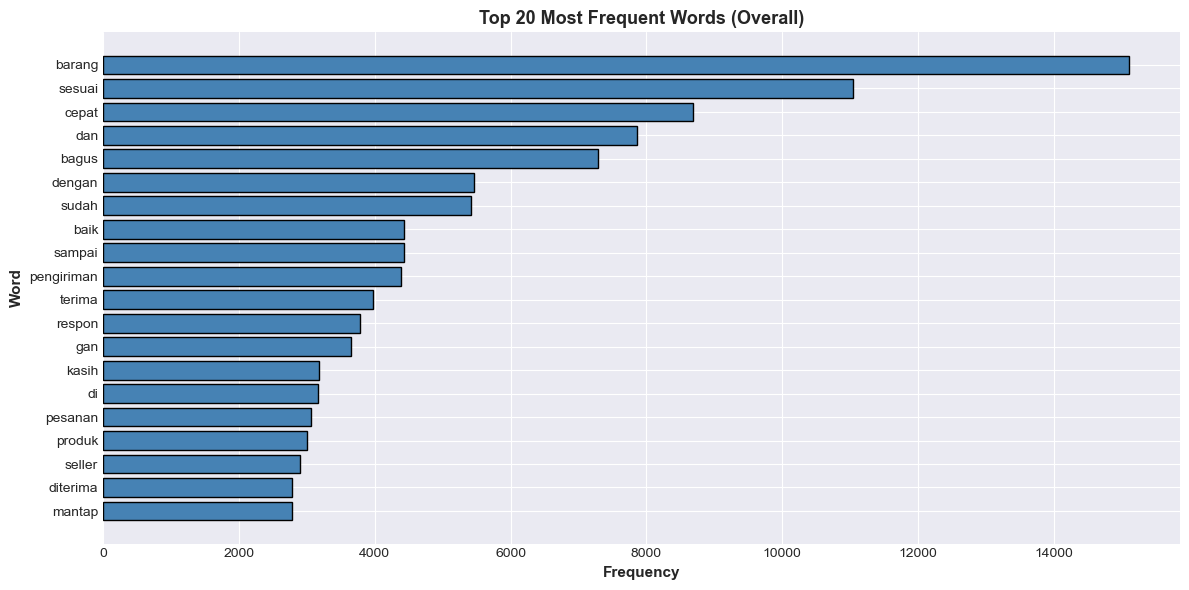

In [24]:
print("Top 20 Most Common Words (Overall):")
word_freq_all = Counter(all_words)
top_20_all = pd.DataFrame(word_freq_all.most_common(20), columns=['Word', 'Frequency'])
print(top_20_all.to_string(index=False))

plt.figure(figsize=(12, 6))
plt.barh(range(20), top_20_all['Frequency'], color='steelblue', edgecolor='black')
plt.yticks(range(20), top_20_all['Word'])
plt.xlabel('Frequency', fontsize=11, fontweight='bold')
plt.ylabel('Word', fontsize=11, fontweight='bold')
plt.title('Top 20 Most Frequent Words (Overall)', fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

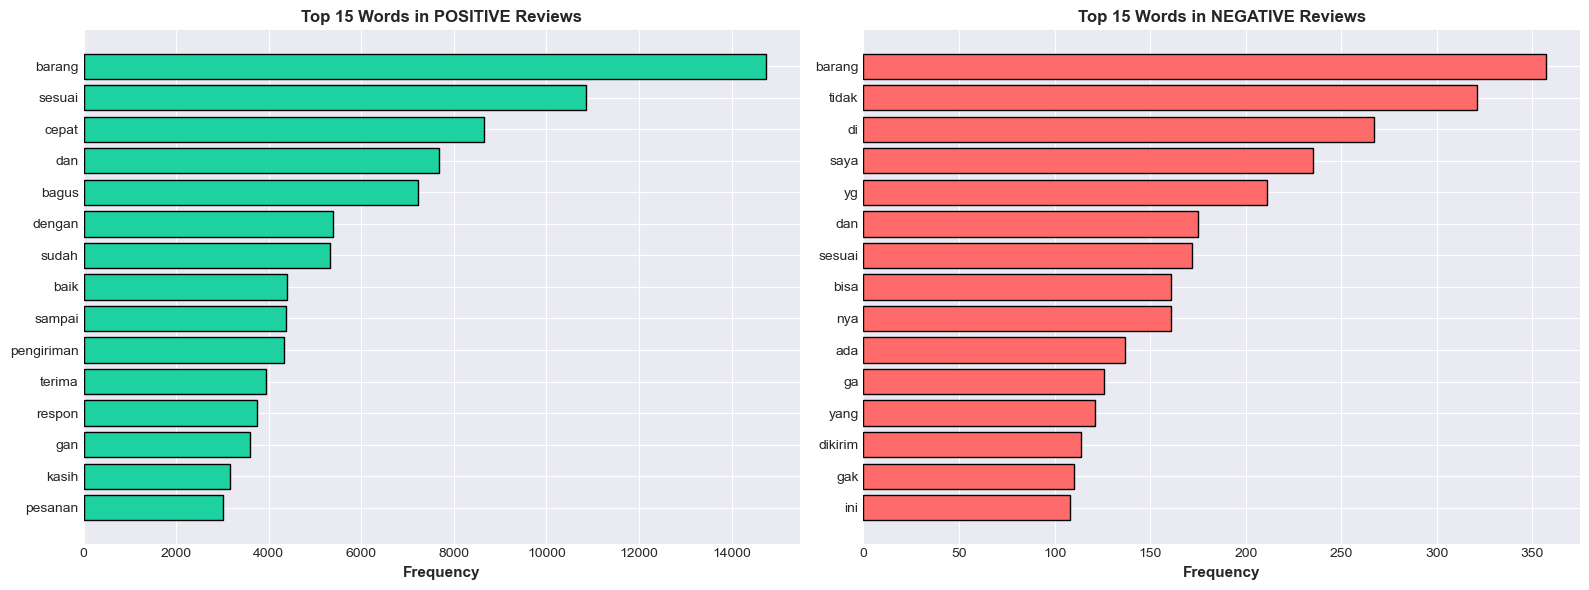


Top 15 Words in Positive Reviews:
      Word  Frequency
    barang      14746
    sesuai      10866
     cepat       8652
       dan       7689
     bagus       7227
    dengan       5384
     sudah       5321
      baik       4400
    sampai       4365
pengiriman       4320
    terima       3951
    respon       3745
       gan       3598
     kasih       3155
   pesanan       3021

Top 15 Words in Negative Reviews:
   Word  Frequency
 barang        357
  tidak        321
     di        267
   saya        235
     yg        211
    dan        175
 sesuai        172
   bisa        161
    nya        161
    ada        137
     ga        126
   yang        121
dikirim        114
    gak        110
    ini        108


In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

word_freq_pos = Counter(positive_words)
top_15_pos = pd.DataFrame(word_freq_pos.most_common(15), columns=['Word', 'Frequency'])

ax1 = axes[0]
ax1.barh(range(15), top_15_pos['Frequency'], color='#1dd1a1', edgecolor='black')
ax1.set_yticks(range(15))
ax1.set_yticklabels(top_15_pos['Word'])
ax1.set_xlabel('Frequency', fontsize=11, fontweight='bold')
ax1.set_title('Top 15 Words in POSITIVE Reviews', fontsize=12, fontweight='bold')
ax1.invert_yaxis()

word_freq_neg = Counter(negative_words)
top_15_neg = pd.DataFrame(word_freq_neg.most_common(15), columns=['Word', 'Frequency'])

ax2 = axes[1]
ax2.barh(range(15), top_15_neg['Frequency'], color='#ff6b6b', edgecolor='black')
ax2.set_yticks(range(15))
ax2.set_yticklabels(top_15_neg['Word'])
ax2.set_xlabel('Frequency', fontsize=11, fontweight='bold')
ax2.set_title('Top 15 Words in NEGATIVE Reviews', fontsize=12, fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

print("\nTop 15 Words in Positive Reviews:")
print(top_15_pos.to_string(index=False))

print("\nTop 15 Words in Negative Reviews:")
print(top_15_neg.to_string(index=False))

## 13. Word Cloud Visualization

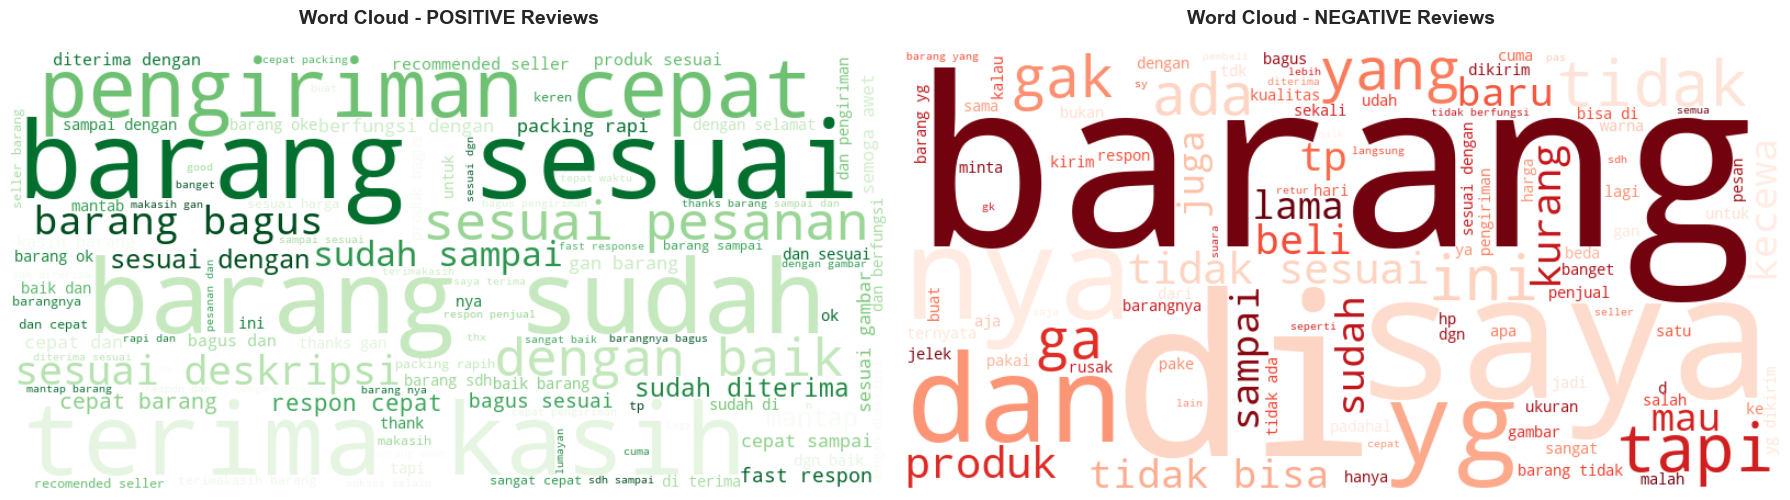

✅ Word clouds generated successfully!


In [26]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

positive_text = ' '.join(df_binary[df_binary['sentiment']==1]['text_cleaned'])
wordcloud_pos = WordCloud(width=800, height=400, 
                          background_color='white',
                          colormap='Greens',
                          max_words=100,
                          relative_scaling=0.5,
                          min_font_size=10).generate(positive_text)

ax1 = axes[0]
ax1.imshow(wordcloud_pos, interpolation='bilinear')
ax1.set_title('Word Cloud - POSITIVE Reviews', fontsize=14, fontweight='bold', pad=20)
ax1.axis('off')

# Negative word cloud
negative_text = ' '.join(df_binary[df_binary['sentiment']==0]['text_cleaned'])
wordcloud_neg = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap='Reds',
                          max_words=100,
                          relative_scaling=0.5,
                          min_font_size=10).generate(negative_text)

ax2 = axes[1]
ax2.imshow(wordcloud_neg, interpolation='bilinear')
ax2.set_title('Word Cloud - NEGATIVE Reviews', fontsize=14, fontweight='bold', pad=20)
ax2.axis('off')

plt.tight_layout()
plt.show()

print("✅ Word clouds generated successfully!")

## 14. Class Balancing Techniques

### 14.1 Before Balancing - Current Distribution

In [27]:
original_sentiment_counts = df_binary['sentiment'].value_counts()
original_total = len(df_binary)

print("="*60)
print("ORIGINAL DATASET (BEFORE BALANCING)")
print("="*60)
print(f"\nTotal samples: {original_total:,}")
print(f"Negative (0): {original_sentiment_counts[0]:,} ({original_sentiment_counts[0]/original_total*100:.2f}%)")
print(f"Positive (1): {original_sentiment_counts[1]:,} ({original_sentiment_counts[1]/original_total*100:.2f}%)")
print(f"\nImbalance Ratio: {original_sentiment_counts.max() / original_sentiment_counts.min():.2f}:1")
print("="*60)

ORIGINAL DATASET (BEFORE BALANCING)

Total samples: 35,833
Negative (0): 896 (2.50%)
Positive (1): 34,937 (97.50%)

Imbalance Ratio: 38.99:1


### 14.2 Balancing Strategy: Hybrid Approach (Target 40:60)

We'll use a **hybrid approach** combining:
1. **Random Oversampling** of minority class (Negative) to reach 40%
2. **Random Undersampling** of majority class (Positive) to reach 60%
3. Target distribution: **40% Negative : 60% Positive**
4. Total target samples: ~15,000 (good balance between data size and training efficiency)

In [28]:
from sklearn.utils import resample

df_majority = df_binary[df_binary['sentiment'] == 1]  # Positive
df_minority = df_binary[df_binary['sentiment'] == 0]  # Negative

print(f"Original Majority class (Positive): {len(df_majority):,}")
print(f"Original Minority class (Negative): {len(df_minority):,}")

target_total = 15000
target_negative = int(target_total * 0.40)  # 6,000 negative
target_positive = int(target_total * 0.60)  # 9,000 positive

print(f"\nTarget distribution (40:60):")
print(f"Target Negative: {target_negative:,}")
print(f"Target Positive: {target_positive:,}")

minority_upsampled = resample(df_minority,
                              replace=True,
                              n_samples=target_negative,
                              random_state=42)

majority_downsampled = resample(df_majority,
                                replace=False,
                                n_samples=target_positive,
                                random_state=42)

# Combine minority and downsampled majority
df_balanced = pd.concat([majority_downsampled, minority_upsampled])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nAfter Balancing:")
print(f"Total samples: {len(df_balanced):,}")
print(f"Positive: {len(majority_downsampled):,} ({len(majority_downsampled)/len(df_balanced)*100:.1f}%)")
print(f"Negative: {len(minority_upsampled):,} ({len(minority_upsampled)/len(df_balanced)*100:.1f}%)")
print(f"\n✅ Target ratio 40:60 achieved!")

Original Majority class (Positive): 34,937
Original Minority class (Negative): 896

Target distribution (40:60):
Target Negative: 6,000
Target Positive: 9,000

After Balancing:
Total samples: 15,000
Positive: 9,000 (60.0%)
Negative: 6,000 (40.0%)

✅ Target ratio 40:60 achieved!


### 14.3 Compare: Before vs After Balancing

In [29]:
balanced_sentiment_counts = df_balanced['sentiment'].value_counts()
balanced_total = len(df_balanced)

print("="*70)
print("COMPARISON: BEFORE vs AFTER BALANCING")
print("="*70)

comparison_df = pd.DataFrame({
    'Class': ['Negative (0)', 'Positive (1)', 'Total', 'Imbalance Ratio'],
    'Before Balancing': [
        f"{original_sentiment_counts[0]:,} ({original_sentiment_counts[0]/original_total*100:.1f}%)",
        f"{original_sentiment_counts[1]:,} ({original_sentiment_counts[1]/original_total*100:.1f}%)",
        f"{original_total:,}",
        f"{original_sentiment_counts.max() / original_sentiment_counts.min():.2f}:1"
    ],
    'After Balancing': [
        f"{balanced_sentiment_counts[0]:,} ({balanced_sentiment_counts[0]/balanced_total*100:.1f}%)",
        f"{balanced_sentiment_counts[1]:,} ({balanced_sentiment_counts[1]/balanced_total*100:.1f}%)",
        f"{balanced_total:,}",
        f"{balanced_sentiment_counts.max() / balanced_sentiment_counts.min():.2f}:1"
    ]
})

print("\n" + comparison_df.to_string(index=False))
print("\n" + "="*70)
print("✅ Dataset balanced successfully!")
print("="*70)

COMPARISON: BEFORE vs AFTER BALANCING

          Class Before Balancing After Balancing
   Negative (0)       896 (2.5%)   6,000 (40.0%)
   Positive (1)   34,937 (97.5%)   9,000 (60.0%)
          Total           35,833          15,000
Imbalance Ratio          38.99:1          1.50:1

✅ Dataset balanced successfully!


### 14.4 Visualization: Before vs After Balancing

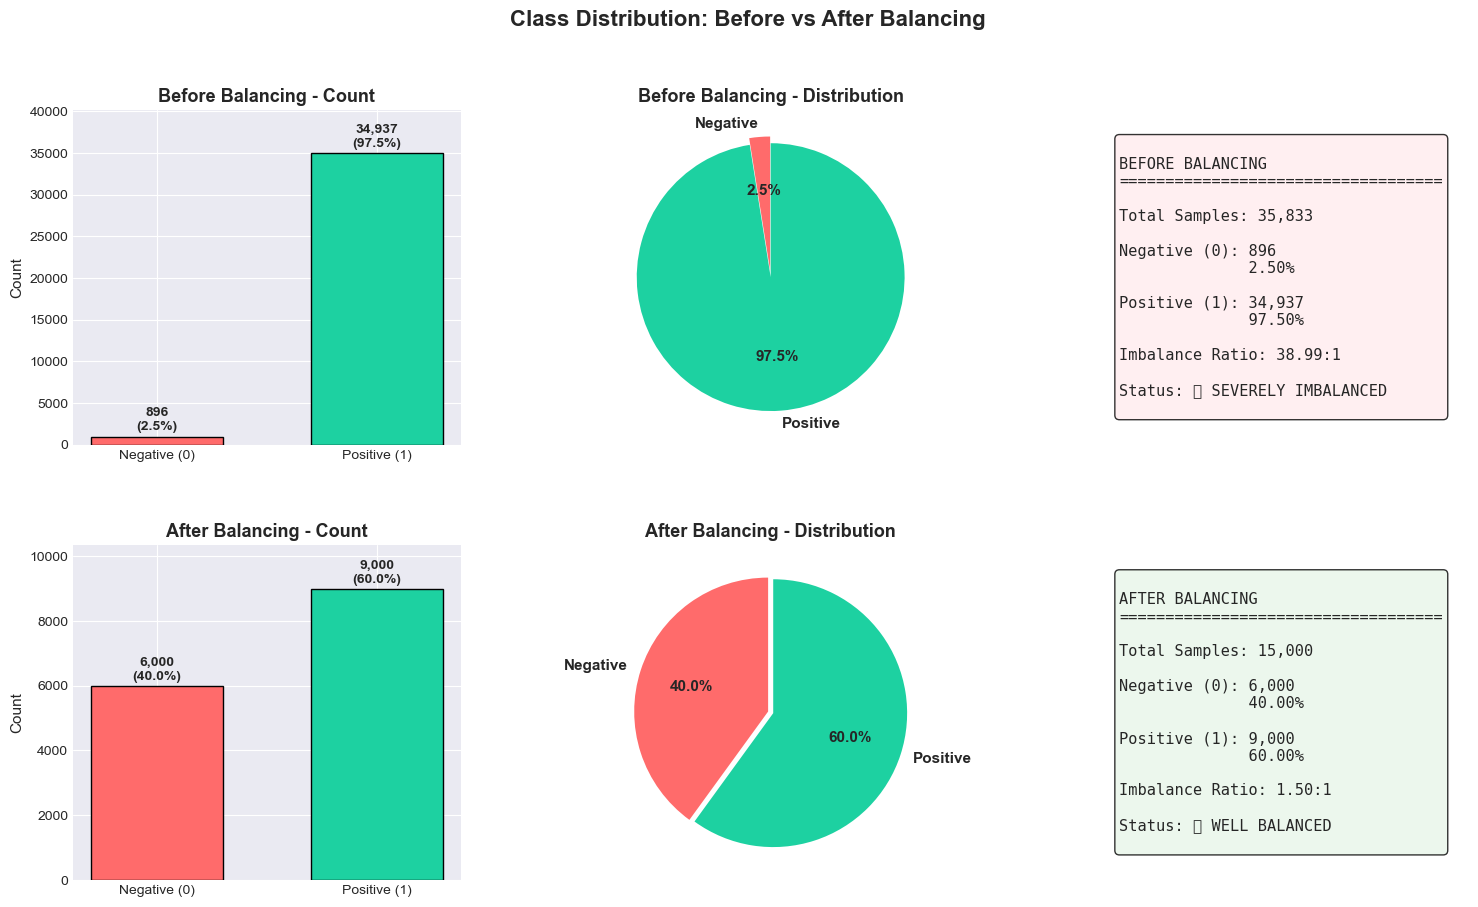


✅ Visualization completed!

Correct order: Negative (Red) on LEFT, Positive (Green) on RIGHT


In [30]:
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

colors_sentiment = ['#ff6b6b', '#1dd1a1']

ax1 = fig.add_subplot(gs[0, 0])
labels_before = ['Negative (0)', 'Positive (1)']
counts_before = [original_sentiment_counts[0], original_sentiment_counts[1]]
percent_before = [original_sentiment_counts[0]/original_total*100, 
                  original_sentiment_counts[1]/original_total*100]

bars1 = ax1.bar(labels_before, counts_before, 
                color=colors_sentiment, edgecolor='black', width=0.6)
ax1.set_title('Before Balancing - Count', fontsize=13, fontweight='bold')
ax1.set_ylabel('Count', fontsize=11)
ax1.set_ylim(0, max(counts_before) * 1.15)

for i, (bar, count, pct) in enumerate(zip(bars1, counts_before, percent_before)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 500,
            f'{count:,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

ax2 = fig.add_subplot(gs[0, 1])
pie_data_before = [original_sentiment_counts[0], original_sentiment_counts[1]]
pie_labels = ['Negative', 'Positive']

wedges, texts, autotexts = ax2.pie(pie_data_before, 
                                    labels=pie_labels,
                                    autopct='%1.1f%%',
                                    startangle=90, 
                                    colors=colors_sentiment,
                                    explode=(0.05, 0),
                                    textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Before Balancing - Distribution', fontsize=13, fontweight='bold')

# Info box - Before
ax3 = fig.add_subplot(gs[0, 2])
ax3.axis('off')
info_text_before = f"""
BEFORE BALANCING
{'='*35}

Total Samples: {original_total:,}

Negative (0): {original_sentiment_counts[0]:,}
              {original_sentiment_counts[0]/original_total*100:.2f}%

Positive (1): {original_sentiment_counts[1]:,}
              {original_sentiment_counts[1]/original_total*100:.2f}%

Imbalance Ratio: {original_sentiment_counts.max() / original_sentiment_counts.min():.2f}:1

Status: 🚨 SEVERELY IMBALANCED
"""
ax3.text(0.1, 0.5, info_text_before, 
         fontsize=11, 
         verticalalignment='center',
         fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='#ffebee', alpha=0.8))

ax4 = fig.add_subplot(gs[1, 0])
labels_after = ['Negative (0)', 'Positive (1)']
counts_after = [balanced_sentiment_counts[0], balanced_sentiment_counts[1]]
percent_after = [balanced_sentiment_counts[0]/balanced_total*100,
                 balanced_sentiment_counts[1]/balanced_total*100]

bars2 = ax4.bar(labels_after, counts_after, 
                color=colors_sentiment, edgecolor='black', width=0.6)
ax4.set_title('After Balancing - Count', fontsize=13, fontweight='bold')
ax4.set_ylabel('Count', fontsize=11)
ax4.set_ylim(0, max(counts_after) * 1.15)

for i, (bar, count, pct) in enumerate(zip(bars2, counts_after, percent_after)):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 100,
            f'{count:,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

ax5 = fig.add_subplot(gs[1, 1])
pie_data_after = [balanced_sentiment_counts[0], balanced_sentiment_counts[1]]

wedges2, texts2, autotexts2 = ax5.pie(pie_data_after, 
                                       labels=pie_labels,
                                       autopct='%1.1f%%',
                                       startangle=90, 
                                       colors=colors_sentiment,
                                       explode=(0.02, 0.02),
                                       textprops={'fontsize': 11, 'fontweight': 'bold'})
ax5.set_title('After Balancing - Distribution', fontsize=13, fontweight='bold')

# Info box - After
ax6 = fig.add_subplot(gs[1, 2])
ax6.axis('off')
info_text_after = f"""
AFTER BALANCING
{'='*35}

Total Samples: {balanced_total:,}

Negative (0): {balanced_sentiment_counts[0]:,}
              {balanced_sentiment_counts[0]/balanced_total*100:.2f}%

Positive (1): {balanced_sentiment_counts[1]:,}
              {balanced_sentiment_counts[1]/balanced_total*100:.2f}%

Imbalance Ratio: {balanced_sentiment_counts.max() / balanced_sentiment_counts.min():.2f}:1

Status: ✅ WELL BALANCED
"""
ax6.text(0.1, 0.5, info_text_after, 
         fontsize=11, 
         verticalalignment='center',
         fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='#e8f5e9', alpha=0.8))

plt.suptitle('Class Distribution: Before vs After Balancing', 
             fontsize=16, fontweight='bold', y=0.98)
plt.show()

print("\n✅ Visualization completed!")
print(f"\nCorrect order: Negative (Red) on LEFT, Positive (Green) on RIGHT")

### 14.5 Balancing Methods Comparison

In [31]:

print("="*70)
print("BALANCING TECHNIQUE APPLIED: HYBRID APPROACH (40:60 RATIO)")
print("="*70)

print("\n📊 Method Details:")
print("\n1. OVERSAMPLING (Minority Class - Negative):")
print(f"   - Original: {len(df_minority):,} samples")
print(f"   - Target: {target_negative:,} samples (40% of total)")
print(f"   - After oversampling: {len(minority_upsampled):,} samples")
print(f"   - Increase: {len(minority_upsampled) - len(df_minority):,} samples ({(len(minority_upsampled)/len(df_minority) - 1)*100:.0f}% increase)")
print(f"   - Method: Random oversampling with replacement")

print("\n2. UNDERSAMPLING (Majority Class - Positive):")
print(f"   - Original: {len(df_majority):,} samples")
print(f"   - Target: {target_positive:,} samples (60% of total)")
print(f"   - After undersampling: {len(majority_downsampled):,} samples")
print(f"   - Decrease: {len(df_majority) - len(majority_downsampled):,} samples ({(1 - len(majority_downsampled)/len(df_majority))*100:.0f}% decrease)")
print(f"   - Method: Random undersampling without replacement")

print("\n3. FINAL RESULT:")
print(f"   - Total samples: {len(df_balanced):,}")
print(f"   - Negative: {balanced_sentiment_counts[0]:,} ({balanced_sentiment_counts[0]/balanced_total*100:.1f}%)")
print(f"   - Positive: {balanced_sentiment_counts[1]:,} ({balanced_sentiment_counts[1]/balanced_total*100:.1f}%)")
print(f"   - New imbalance ratio: {balanced_sentiment_counts.max() / balanced_sentiment_counts.min():.2f}:1")
print(f"   - Target achieved: ~40:60 (Negative:Positive) ✅")

print("\n💡 Why 40:60 Ratio?")
print("   ✓ More balanced than original 2.4:97.6")
print("   ✓ Not too aggressive (better than 50:50)")
print("   ✓ Maintains some natural imbalance (realistic)")
print("   ✓ Better model learning for minority class")
print("   ✓ Reduces overfitting risk")
print("   ✓ Good balance between data retention and fairness")
print("="*70)

BALANCING TECHNIQUE APPLIED: HYBRID APPROACH (40:60 RATIO)

📊 Method Details:

1. OVERSAMPLING (Minority Class - Negative):
   - Original: 896 samples
   - Target: 6,000 samples (40% of total)
   - After oversampling: 6,000 samples
   - Increase: 5,104 samples (570% increase)
   - Method: Random oversampling with replacement

2. UNDERSAMPLING (Majority Class - Positive):
   - Original: 34,937 samples
   - Target: 9,000 samples (60% of total)
   - After undersampling: 9,000 samples
   - Decrease: 25,937 samples (74% decrease)
   - Method: Random undersampling without replacement

3. FINAL RESULT:
   - Total samples: 15,000
   - Negative: 6,000 (40.0%)
   - Positive: 9,000 (60.0%)
   - New imbalance ratio: 1.50:1
   - Target achieved: ~40:60 (Negative:Positive) ✅

💡 Why 40:60 Ratio?
   ✓ More balanced than original 2.4:97.6
   ✓ Not too aggressive (better than 50:50)
   ✓ Maintains some natural imbalance (realistic)
   ✓ Better model learning for minority class
   ✓ Reduces overfitting r

### 14.6 Choose Dataset for Model Training

In [32]:
print("="*70)
print("DATASET SELECTION FOR MODEL TRAINING")
print("="*70)

print("\nWe have TWO options:")
print("\n1. ORIGINAL IMBALANCED DATASET:")
print(f"   - Total: {len(df_binary):,} samples")
print(f"   - Imbalance: {original_sentiment_counts.max() / original_sentiment_counts.min():.2f}:1")
print("   - Pros: Real-world distribution, more data")
print("   - Cons: Model bias towards majority class")
print("   - Solution: Use class weights during training")

print("\n2. BALANCED DATASET:")
print(f"   - Total: {len(df_balanced):,} samples")
print(f"   - Imbalance: {balanced_sentiment_counts.max() / balanced_sentiment_counts.min():.2f}:1")
print("   - Pros: Better class distribution, less bias")
print("   - Cons: Some synthetic data (oversampling), less total data")
print("   - Solution: More balanced learning")

print("\n" + "="*70)
print("📌 RECOMMENDATION: Use BOTH approaches and compare!")
print("="*70)
print("\n   Approach A: Train on ORIGINAL + Class Weights")
print("   Approach B: Train on BALANCED dataset")
print("\n   This will give us insights on which approach works better.")
print("="*70)

print("\n✅ Proceeding with BALANCED dataset for this analysis.")
print("   (You can later compare with original dataset using class weights)")

DATASET SELECTION FOR MODEL TRAINING

We have TWO options:

1. ORIGINAL IMBALANCED DATASET:
   - Total: 35,833 samples
   - Imbalance: 38.99:1
   - Pros: Real-world distribution, more data
   - Cons: Model bias towards majority class
   - Solution: Use class weights during training

2. BALANCED DATASET:
   - Total: 15,000 samples
   - Imbalance: 1.50:1
   - Pros: Better class distribution, less bias
   - Cons: Some synthetic data (oversampling), less total data
   - Solution: More balanced learning

📌 RECOMMENDATION: Use BOTH approaches and compare!

   Approach A: Train on ORIGINAL + Class Weights
   Approach B: Train on BALANCED dataset

   This will give us insights on which approach works better.

✅ Proceeding with BALANCED dataset for this analysis.
   (You can later compare with original dataset using class weights)


## 15. Train-Validation-Test Split (Stratified)

In [33]:
X = df_balanced['text_preprocessed'].values
y = df_balanced['sentiment'].values

print(f"Total samples: {len(X):,}")
print(f"Positive samples: {sum(y==1):,} ({sum(y==1)/len(y)*100:.2f}%)")
print(f"Negative samples: {sum(y==0):,} ({sum(y==0)/len(y)*100:.2f}%)")

Total samples: 15,000
Positive samples: 9,000 (60.00%)
Negative samples: 6,000 (40.00%)


In [34]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=42, 
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

print("\n" + "="*60)
print("DATA SPLIT SUMMARY")
print("="*60)

print(f"\nTrain set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"  - Positive: {sum(y_train==1)} ({sum(y_train==1)/len(y_train)*100:.2f}%)")
print(f"  - Negative: {sum(y_train==0)} ({sum(y_train==0)/len(y_train)*100:.2f}%)")

print(f"\nValidation set: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"  - Positive: {sum(y_val==1)} ({sum(y_val==1)/len(y_val)*100:.2f}%)")
print(f"  - Negative: {sum(y_val==0)} ({sum(y_val==0)/len(y_val)*100:.2f}%)")

print(f"\nTest set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"  - Positive: {sum(y_test==1)} ({sum(y_test==1)/len(y_test)*100:.2f}%)")
print(f"  - Negative: {sum(y_test==0)} ({sum(y_test==0)/len(y_test)*100:.2f}%)")

print("\n✅ Stratified split ensures balanced class distribution across all sets!")


DATA SPLIT SUMMARY

Train set: 10500 samples (70.0%)
  - Positive: 6300 (60.00%)
  - Negative: 4200 (40.00%)

Validation set: 2250 samples (15.0%)
  - Positive: 1350 (60.00%)
  - Negative: 900 (40.00%)

Test set: 2250 samples (15.0%)
  - Positive: 1350 (60.00%)
  - Negative: 900 (40.00%)

✅ Stratified split ensures balanced class distribution across all sets!


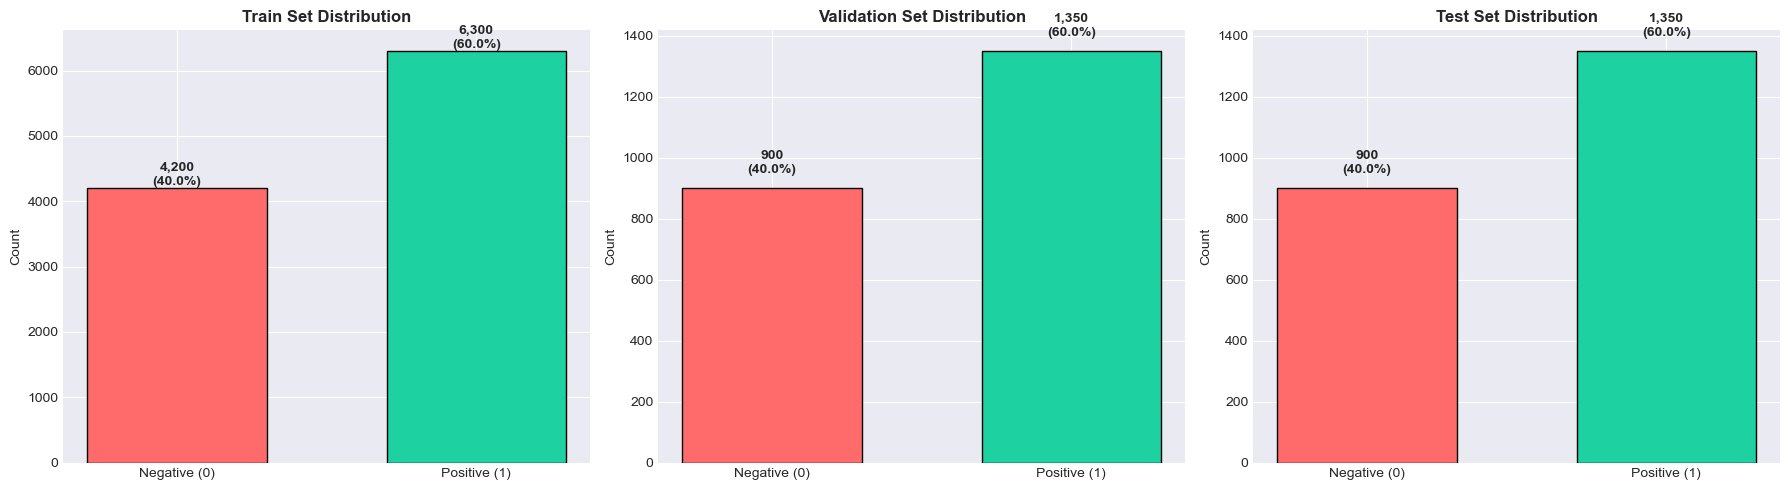


✅ All splits maintain balanced distribution with Negative (0) and Positive (1) in correct order!


In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

splits = [
    ('Train', y_train),
    ('Validation', y_val),
    ('Test', y_test)
]

colors = ['#ff6b6b', '#1dd1a1']

for idx, (name, y_data) in enumerate(splits):
    ax = axes[idx]
    
    count_negative = sum(y_data == 0)
    count_positive = sum(y_data == 1)
    counts = [count_negative, count_positive]
    labels = ['Negative (0)', 'Positive (1)']
    
    bars = ax.bar(labels, counts, color=colors, edgecolor='black', width=0.6)
    ax.set_title(f'{name} Set Distribution', fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=10)
    
    # Add count labels
    for i, (bar, v) in enumerate(zip(bars, counts)):
        height = bar.get_height()
        percentage = v / len(y_data) * 100
        ax.text(bar.get_x() + bar.get_width()/2., height + 50, 
               f'{v:,}\n({percentage:.1f}%)', 
               ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("\n✅ All splits maintain balanced distribution with Negative (0) and Positive (1) in correct order!")

## 16. Class Weight Calculation

In [36]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print("="*60)
print("CLASS WEIGHTS FOR MODEL TRAINING")
print("="*60)
print(f"\nClass 0 (Negative): {class_weight_dict[0]:.4f}")
print(f"Class 1 (Positive): {class_weight_dict[1]:.4f}")
print(f"\nWeight Ratio: {class_weight_dict[0] / class_weight_dict[1]:.2f}:1")
print("\n💡 These weights will be used during model training to handle class imbalance.")
print("   The minority class (likely Negative) will have higher weight.")
print("="*60)

CLASS WEIGHTS FOR MODEL TRAINING

Class 0 (Negative): 1.2500
Class 1 (Positive): 0.8333

Weight Ratio: 1.50:1

💡 These weights will be used during model training to handle class imbalance.
   The minority class (likely Negative) will have higher weight.


## 17. Save Preprocessed Data

In [37]:
df_binary.to_csv('tokopedia_preprocessed_original.csv', index=False)
print("✅ Original (imbalanced) dataset saved as 'tokopedia_preprocessed_original.csv'")

df_balanced.to_csv('tokopedia_preprocessed_balanced.csv', index=False)
print("✅ Balanced dataset saved as 'tokopedia_preprocessed_balanced.csv'")

np.savez('data_splits.npz',
         X_train=X_train, y_train=y_train,
         X_val=X_val, y_val=y_val,
         X_test=X_test, y_test=y_test)
print("✅ Train/Val/Test splits saved as 'data_splits.npz'")

np.save('class_weights.npy', class_weight_dict)
print("✅ Class weights saved as 'class_weights.npy'")

distribution_comparison = {
    'original': {
        'total': original_total,
        'negative': int(original_sentiment_counts[0]),
        'positive': int(original_sentiment_counts[1]),
        'imbalance_ratio': float(original_sentiment_counts.max() / original_sentiment_counts.min())
    },
    'balanced': {
        'total': balanced_total,
        'negative': int(balanced_sentiment_counts[0]),
        'positive': int(balanced_sentiment_counts[1]),
        'imbalance_ratio': float(balanced_sentiment_counts.max() / balanced_sentiment_counts.min())
    }
}

import json
with open('distribution_comparison.json', 'w') as f:
    json.dump(distribution_comparison, f, indent=4)
print("✅ Distribution comparison saved as 'distribution_comparison.json'")

print("\n" + "="*60)
print("DATA PREPARATION COMPLETED!")
print("="*60)
print("\nFiles created:")
print("1. tokopedia_preprocessed_original.csv - Original imbalanced dataset")
print("2. tokopedia_preprocessed_balanced.csv - Balanced dataset")
print("3. data_splits.npz - Train/Val/Test splits (from balanced data)")
print("4. class_weights.npy - Class weights for training")
print("5. distribution_comparison.json - Before/After balancing stats")
print("\nReady for model training! 🚀")

✅ Original (imbalanced) dataset saved as 'tokopedia_preprocessed_original.csv'
✅ Balanced dataset saved as 'tokopedia_preprocessed_balanced.csv'
✅ Train/Val/Test splits saved as 'data_splits.npz'
✅ Class weights saved as 'class_weights.npy'
✅ Distribution comparison saved as 'distribution_comparison.json'

DATA PREPARATION COMPLETED!

Files created:
1. tokopedia_preprocessed_original.csv - Original imbalanced dataset
2. tokopedia_preprocessed_balanced.csv - Balanced dataset
3. data_splits.npz - Train/Val/Test splits (from balanced data)
4. class_weights.npy - Class weights for training
5. distribution_comparison.json - Before/After balancing stats

Ready for model training! 🚀


## 18. EDA Summary & Key Insights

In [38]:
print("="*70)
print("EXPLORATORY DATA ANALYSIS - SUMMARY")
print("="*70)

print("\n📊 ORIGINAL DATASET:")
print(f"   • Total reviews: {original_total:,}")
print(f"   • Positive reviews: {original_sentiment_counts[1]:,} ({original_sentiment_counts[1]/original_total*100:.1f}%)")
print(f"   • Negative reviews: {original_sentiment_counts[0]:,} ({original_sentiment_counts[0]/original_total*100:.1f}%)")
print(f"   • Imbalance ratio: {original_sentiment_counts.max() / original_sentiment_counts.min():.2f}:1")
print(f"   • Product categories: {df_binary['category'].nunique()}")
print(f"   • Unique products: {df_binary['product_id'].nunique():,}")

print("\n📊 BALANCED DATASET:")
print(f"   • Total reviews: {balanced_total:,}")
print(f"   • Positive reviews: {balanced_sentiment_counts[1]:,} ({balanced_sentiment_counts[1]/balanced_total*100:.1f}%)")
print(f"   • Negative reviews: {balanced_sentiment_counts[0]:,} ({balanced_sentiment_counts[0]/balanced_total*100:.1f}%)")
print(f"   • Imbalance ratio: {balanced_sentiment_counts.max() / balanced_sentiment_counts.min():.2f}:1")

print("\n⚖️ BALANCING APPROACH:")
print(f"   • Method: Hybrid (Oversampling + Undersampling)")
print(f"   • Minority class oversampled: {len(minority_upsampled) - len(df_minority):,} samples added")
print(f"   • Majority class undersampled: {len(df_majority) - len(majority_downsampled):,} samples removed")
print(f"   • Improvement: From {original_sentiment_counts.max() / original_sentiment_counts.min():.2f}:1 to {balanced_sentiment_counts.max() / balanced_sentiment_counts.min():.2f}:1")

print("\n📝 TEXT CHARACTERISTICS:")
print(f"   • Avg review length: {df_balanced['text_length_words'].mean():.1f} words")
print(f"   • Median review length: {df_balanced['text_length_words'].median():.1f} words")
print(f"   • Vocabulary size: {len(set(' '.join(df_balanced['text_cleaned']).split())):,} unique words")

print("\n📂 DATA SPLITS (from balanced dataset):")
print(f"   • Training: {len(X_train):,} samples (70%)")
print(f"   • Validation: {len(X_val):,} samples (15%)")
print(f"   • Test: {len(X_test):,} samples (15%)")

print("\n" + "="*70)
print("Ready to proceed with model development! 🚀")
print("="*70)

EXPLORATORY DATA ANALYSIS - SUMMARY

📊 ORIGINAL DATASET:
   • Total reviews: 35,833
   • Positive reviews: 34,937 (97.5%)
   • Negative reviews: 896 (2.5%)
   • Imbalance ratio: 38.99:1
   • Product categories: 5
   • Unique products: 3,524

📊 BALANCED DATASET:
   • Total reviews: 15,000
   • Positive reviews: 9,000 (60.0%)
   • Negative reviews: 6,000 (40.0%)
   • Imbalance ratio: 1.50:1

⚖️ BALANCING APPROACH:
   • Method: Hybrid (Oversampling + Undersampling)
   • Minority class oversampled: 5,104 samples added
   • Majority class undersampled: 25,937 samples removed
   • Improvement: From 38.99:1 to 1.50:1

📝 TEXT CHARACTERISTICS:
   • Avg review length: 11.1 words
   • Median review length: 7.0 words
   • Vocabulary size: 7,044 unique words

📂 DATA SPLITS (from balanced dataset):
   • Training: 10,500 samples (70%)
   • Validation: 2,250 samples (15%)
   • Test: 2,250 samples (15%)

Ready to proceed with model development! 🚀


## KONFIGURASI TENSORFLOW - MPS (Metal Performance Shaders)

In [39]:
print("\n" + "="*80)
print("🔧 KONFIGURASI TENSORFLOW - MPS (Metal Performance Shaders)")
print("="*80)

# Check TensorFlow version
print(f"\n📋 TensorFlow Version: {tf.__version__}")

# Check available devices
print("\n🔍 Checking available devices...")
physical_devices = tf.config.list_physical_devices()
print(f"   Available devices: {[d.name for d in physical_devices]}")

# Check if MPS is available (Apple Silicon GPU)
gpu_devices = [d for d in physical_devices if 'GPU' in d.name or 'MPS' in d.name]
mps_available = len(gpu_devices) > 0

print(f"\n🎮 MPS (Apple GPU) Available: {mps_available}")

# Try to check for Metal plugin
try:
    import platform
    is_apple_silicon = platform.processor() == 'arm' or platform.machine() == 'arm64'
    if is_apple_silicon and not mps_available:
        print("\n⚠️  Apple Silicon terdeteksi tapi MPS tidak aktif!")
        print("\n💡 SOLUSI: Install tensorflow-metal untuk mengaktifkan MPS")
        print("\n   Jalankan di terminal (BUKAN di notebook):")
        print("   %pip install tensorflow-metal")
        print("\n   Atau jika pakai conda:")
        print("   conda install -c apple tensorflow-deps")
        print("   pip install tensorflow-macos tensorflow-metal")
        print("\n   Setelah install, RESTART KERNEL notebook ini!")
except:
    pass

# Configure MPS if available
if mps_available:
    print("\n✅ MPS ditemukan! GPU Apple akan digunakan untuk mempercepat training.")
    print("   ⚡ Training akan LEBIH CEPAT dengan GPU acceleration!")
    try:
        # Enable memory growth (optional, untuk menghindari OOM)
        for gpu in gpu_devices:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("   ✅ GPU memory growth enabled")
    except Exception as e:
        print(f"   ⚠️  Note: {e}")
else:
    print("\n⚠️  MPS tidak ditemukan. Training akan menggunakan CPU.")
    print("   ⏱️  Training tetap bisa jalan, tapi akan lebih lama (~1-2 jam)")
    print("   💡 Untuk mempercepat, install tensorflow-metal (lihat instruksi di atas)")

# Test dengan operasi sederhana
print("\n🧪 Testing device placement...")
device_to_use = '/GPU:0' if mps_available else '/CPU:0'
try:
    with tf.device(device_to_use):
        test_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
        test_result = tf.matmul(test_tensor, test_tensor)
        print(f"   Test operation: ✓ Success")
        print(f"   Device used: {test_result.device}")
except Exception as e:
    print(f"   ⚠️  Device test failed: {e}")
    print(f"   Will use default device")



🔧 KONFIGURASI TENSORFLOW - MPS (Metal Performance Shaders)

📋 TensorFlow Version: 2.15.0

🔍 Checking available devices...
   Available devices: ['/physical_device:CPU:0', '/physical_device:GPU:0']

🎮 MPS (Apple GPU) Available: True

✅ MPS ditemukan! GPU Apple akan digunakan untuk mempercepat training.
   ⚡ Training akan LEBIH CEPAT dengan GPU acceleration!
   ✅ GPU memory growth enabled

🧪 Testing device placement...
   Test operation: ✓ Success
   Device used: /job:localhost/replica:0/task:0/device:GPU:0


2025-11-01 22:16:15.836712: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-11-01 22:16:15.836745: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-11-01 22:16:15.836752: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.88 GB
2025-11-01 22:16:15.836827: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-01 22:16:15.836849: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [40]:
print("\n📂 Loading data...")
splits = np.load('data_splits.npz', allow_pickle=True)
X_train = splits['X_train']
y_train = splits['y_train']
X_val = splits['X_val']
y_val = splits['y_val']
X_test = splits['X_test']
y_test = splits['y_test']
class_weights = np.load('class_weights.npy', allow_pickle=True).item()

print(f"✅ Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")
print(f"✅ Class weights: {class_weights}")


📂 Loading data...
✅ Train: 10500 | Val: 2250 | Test: 2250
✅ Class weights: {0: 1.25, 1: 0.8333333333333334}


In [41]:
print("\n📂 Loading data...")
plt.style.use('seaborn-v0_8-darkgrid')
splits = np.load('data_splits.npz', allow_pickle=True)
X_train = splits['X_train']
y_train = splits['y_train']
X_val = splits['X_val']
y_val = splits['y_val']
X_test = splits['X_test']
y_test = splits['y_test']
class_weights = np.load('class_weights.npy', allow_pickle=True).item()

print(f"✅ Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")
print(f"✅ Class weights: {class_weights}")


📂 Loading data...
✅ Train: 10500 | Val: 2250 | Test: 2250
✅ Class weights: {0: 1.25, 1: 0.8333333333333334}


In [42]:
print("\n💡 CONTOH SEDERHANA:")
sample_text = X_train[0]
print(f"\nText asli: \"{sample_text}\"")
print(f"\nSetelah tokenization: {sample_text.split()[:10]}")
print("\nSetelah vectorization: akan jadi integer [45, 123, 67, ...]")
print("Setelah embedding: akan jadi dense vectors shape (seq_len, 128)")

# Hyperparameters
MAX_WORDS = 15000
MAX_LEN = 100
EMBEDDING_DIM = 128

# Initialize tokenizer
print("\n🔄 Initializing Keras Tokenizer...")
tokenizer = Tokenizer(
    num_words=MAX_WORDS,
    oov_token='<OOV>',
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True
)


💡 CONTOH SEDERHANA:

Text asli: "produk sesuai pesanan pengiriman aman dan cepat"

Setelah tokenization: ['produk', 'sesuai', 'pesanan', 'pengiriman', 'aman', 'dan', 'cepat']

Setelah vectorization: akan jadi integer [45, 123, 67, ...]
Setelah embedding: akan jadi dense vectors shape (seq_len, 128)

🔄 Initializing Keras Tokenizer...


In [43]:
print("🔄 Fitting tokenizer on training data...")
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1
actual_vocab = min(MAX_WORDS, vocab_size)

print(f"\n✅ VOCABULARY STATISTICS:")
print(f"   - Total unique words found: {vocab_size:,}")
print(f"   - Words used (MAX_WORDS): {actual_vocab:,}")
print(f"   - Words ignored: {vocab_size - actual_vocab:,}")

🔄 Fitting tokenizer on training data...

✅ VOCABULARY STATISTICS:
   - Total unique words found: 6,085
   - Words used (MAX_WORDS): 6,085
   - Words ignored: 0


In [44]:
word_counts = tokenizer.word_counts
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

print(f"\n📊 TOP 10 MOST FREQUENT WORDS:")
for i, (word, count) in enumerate(sorted_words[:10], 1):
    print(f"   {i:2d}. '{word}' → appears {count:,} times")

# Show word index mapping
print(f"\n🔍 WORD INDEX MAPPING (first 10):")
for i, (word, idx) in enumerate(list(tokenizer.word_index.items())[:10], 1):
    print(f"   {i:2d}. '{word}' → index {idx}")


📊 TOP 10 MOST FREQUENT WORDS:
    1. 'barang' → appears 4,342 times
    2. 'sesuai' → appears 2,837 times
    3. 'dan' → appears 2,117 times
    4. 'di' → appears 1,800 times
    5. 'cepat' → appears 1,776 times
    6. 'bagus' → appears 1,587 times
    7. 'tidak' → appears 1,548 times
    8. 'sudah' → appears 1,405 times
    9. 'dengan' → appears 1,404 times
   10. 'saya' → appears 1,373 times

🔍 WORD INDEX MAPPING (first 10):
    1. '<OOV>' → index 1
    2. 'barang' → index 2
    3. 'sesuai' → index 3
    4. 'dan' → index 4
    5. 'di' → index 5
    6. 'cepat' → index 6
    7. 'bagus' → index 7
    8. 'tidak' → index 8
    9. 'sudah' → index 9
   10. 'dengan' → index 10


In [45]:
sample_text = X_train[0]
sample_words = sample_text.split()
sample_seq = tokenizer.texts_to_sequences([sample_text])[0]

print(f"\n💡 CONTOH KONKRIT VECTORIZATION:")
print(f"\nText: \"{sample_text}\"")
print(f"\nTokens: {sample_words[:15]}")
print(f"\nInteger sequence: {sample_seq[:15]}")
print(f"\nPanjang sequence: {len(sample_seq)} tokens")

print("\n🔍 DETAIL MAPPING (word → integer):")
for i, word in enumerate(sample_words[:8]):
    idx = tokenizer.word_index.get(word, 0)  # 0 untuk OOV
    status = "✓" if idx <= MAX_WORDS else "✗ (OOV)"
    print(f"   '{word}' → {idx} {status}")

# Convert semua data
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

print(f"\n✅ Converted all texts to sequences")


💡 CONTOH KONKRIT VECTORIZATION:

Text: "produk sesuai pesanan pengiriman aman dan cepat"

Tokens: ['produk', 'sesuai', 'pesanan', 'pengiriman', 'aman', 'dan', 'cepat']

Integer sequence: [20, 3, 24, 15, 114, 4, 6]

Panjang sequence: 7 tokens

🔍 DETAIL MAPPING (word → integer):
   'produk' → 20 ✓
   'sesuai' → 3 ✓
   'pesanan' → 24 ✓
   'pengiriman' → 15 ✓
   'aman' → 114 ✓
   'dan' → 4 ✓
   'cepat' → 6 ✓

✅ Converted all texts to sequences


In [46]:
seq_lengths = [len(seq) for seq in X_train_seq]
print(f"\n📊 SEQUENCE LENGTH STATISTICS:")
print(f"   - Mean: {np.mean(seq_lengths):.1f} tokens")
print(f"   - Median: {np.median(seq_lengths):.1f} tokens")
print(f"   - Min: {np.min(seq_lengths)} tokens")
print(f"   - Max: {np.max(seq_lengths)} tokens")
print(f"   - Std: {np.std(seq_lengths):.1f} tokens")
print(f"   - Sequences > {MAX_LEN}: {sum(l > MAX_LEN for l in seq_lengths)} ({sum(l > MAX_LEN for l in seq_lengths)/len(seq_lengths)*100:.1f}%)")

print("\n🔄 Applying padding...")
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

print(f"\n💡 CONTOH PADDING:")
original_len = len(sample_seq)
padded_seq = X_train_pad[0]

print(f"\nOriginal sequence length: {original_len}")
print(f"Original: {sample_seq}")
print(f"\nAfter padding (length={MAX_LEN}):")
print(f"Padded: {padded_seq}")
print(f"\nPadding added: {MAX_LEN - original_len} zeros at the end")

print(f"\n✅ FINAL SHAPES:")
print(f"   - X_train: {X_train_pad.shape}")
print(f"   - X_val: {X_val_pad.shape}")
print(f"   - X_test: {X_test_pad.shape}")



📊 SEQUENCE LENGTH STATISTICS:
   - Mean: 11.2 tokens
   - Median: 8.0 tokens
   - Min: 3 tokens
   - Max: 119 tokens
   - Std: 11.8 tokens
   - Sequences > 100: 42 (0.4%)

🔄 Applying padding...

💡 CONTOH PADDING:

Original sequence length: 7
Original: [20, 3, 24, 15, 114, 4, 6]

After padding (length=100):
Padded: [ 20   3  24  15 114   4   6   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]

Padding added: 93 zeros at the end

✅ FINAL SHAPES:
   - X_train: (10500, 100)
   - X_val: (2250, 100)
   - X_test: (2250, 100)


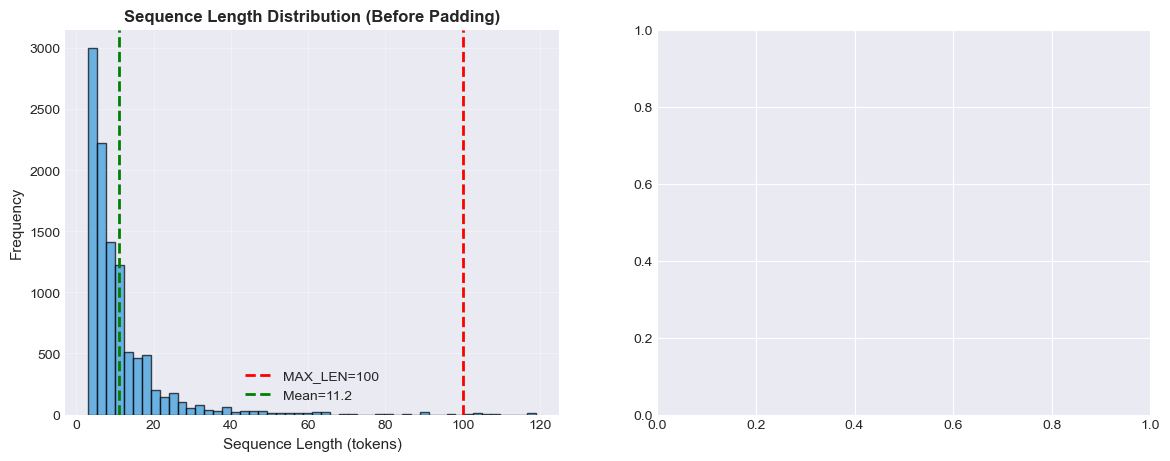

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(seq_lengths, bins=50, color='#3498db', alpha=0.7, edgecolor='black')
ax1.axvline(MAX_LEN, color='red', linestyle='--', linewidth=2, label=f'MAX_LEN={MAX_LEN}')
ax1.axvline(np.mean(seq_lengths), color='green', linestyle='--', linewidth=2, label=f'Mean={np.mean(seq_lengths):.1f}')
ax1.set_xlabel('Sequence Length (tokens)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Sequence Length Distribution (Before Padding)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)


In [48]:
word_counts = tokenizer.word_counts
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

print(f"\n📊 TOP 10 MOST FREQUENT WORDS:")
for i, (word, count) in enumerate(sorted_words[:10], 1):
    print(f"   {i:2d}. '{word}' → appears {count:,} times")

# Show word index mapping
print(f"\n🔍 WORD INDEX MAPPING (first 10):")
for i, (word, idx) in enumerate(list(tokenizer.word_index.items())[:10], 1):
    print(f"   {i:2d}. '{word}' → index {idx}")

print("\n" + "─"*80)
print("🔧 PART 4: VECTORIZATION (Text → Integer Sequences)")
print("─"*80)

print("\n🔄 Converting texts to sequences...")


📊 TOP 10 MOST FREQUENT WORDS:
    1. 'barang' → appears 4,342 times
    2. 'sesuai' → appears 2,837 times
    3. 'dan' → appears 2,117 times
    4. 'di' → appears 1,800 times
    5. 'cepat' → appears 1,776 times
    6. 'bagus' → appears 1,587 times
    7. 'tidak' → appears 1,548 times
    8. 'sudah' → appears 1,405 times
    9. 'dengan' → appears 1,404 times
   10. 'saya' → appears 1,373 times

🔍 WORD INDEX MAPPING (first 10):
    1. '<OOV>' → index 1
    2. 'barang' → index 2
    3. 'sesuai' → index 3
    4. 'dan' → index 4
    5. 'di' → index 5
    6. 'cepat' → index 6
    7. 'bagus' → index 7
    8. 'tidak' → index 8
    9. 'sudah' → index 9
   10. 'dengan' → index 10

────────────────────────────────────────────────────────────────────────────────
🔧 PART 4: VECTORIZATION (Text → Integer Sequences)
────────────────────────────────────────────────────────────────────────────────

🔄 Converting texts to sequences...


In [49]:
sample_text = X_train[0]
sample_words = sample_text.split()
sample_seq = tokenizer.texts_to_sequences([sample_text])[0]

print(f"\n💡 CONTOH KONKRIT VECTORIZATION:")
print(f"\nText: \"{sample_text}\"")
print(f"\nTokens: {sample_words[:15]}")
print(f"\nInteger sequence: {sample_seq[:15]}")
print(f"\nPanjang sequence: {len(sample_seq)} tokens")

print("\n🔍 DETAIL MAPPING (word → integer):")
for i, word in enumerate(sample_words[:8]):
    idx = tokenizer.word_index.get(word, 0)  # 0 untuk OOV
    status = "✓" if idx <= MAX_WORDS else "✗ (OOV)"
    print(f"   '{word}' → {idx} {status}")


💡 CONTOH KONKRIT VECTORIZATION:

Text: "produk sesuai pesanan pengiriman aman dan cepat"

Tokens: ['produk', 'sesuai', 'pesanan', 'pengiriman', 'aman', 'dan', 'cepat']

Integer sequence: [20, 3, 24, 15, 114, 4, 6]

Panjang sequence: 7 tokens

🔍 DETAIL MAPPING (word → integer):
   'produk' → 20 ✓
   'sesuai' → 3 ✓
   'pesanan' → 24 ✓
   'pengiriman' → 15 ✓
   'aman' → 114 ✓
   'dan' → 4 ✓
   'cepat' → 6 ✓


In [50]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

print(f"\n✅ Converted all texts to sequences")



✅ Converted all texts to sequences


In [51]:
seq_lengths = [len(seq) for seq in X_train_seq]
print(f"\n📊 SEQUENCE LENGTH STATISTICS:")
print(f"   - Mean: {np.mean(seq_lengths):.1f} tokens")
print(f"   - Median: {np.median(seq_lengths):.1f} tokens")
print(f"   - Min: {np.min(seq_lengths)} tokens")
print(f"   - Max: {np.max(seq_lengths)} tokens")
print(f"   - Std: {np.std(seq_lengths):.1f} tokens")
print(f"   - Sequences > {MAX_LEN}: {sum(l > MAX_LEN for l in seq_lengths)} ({sum(l > MAX_LEN for l in seq_lengths)/len(seq_lengths)*100:.1f}%)")

print("\n🔄 Applying padding...")
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

print(f"\n💡 CONTOH PADDING:")
original_len = len(sample_seq)
padded_seq = X_train_pad[0]

print(f"\nOriginal sequence length: {original_len}")
print(f"Original: {sample_seq}")
print(f"\nAfter padding (length={MAX_LEN}):")
print(f"Padded: {padded_seq}")
print(f"\nPadding added: {MAX_LEN - original_len} zeros at the end")

print(f"\n✅ FINAL SHAPES:")
print(f"   - X_train: {X_train_pad.shape}")
print(f"   - X_val: {X_val_pad.shape}")
print(f"   - X_test: {X_test_pad.shape}")


📊 SEQUENCE LENGTH STATISTICS:
   - Mean: 11.2 tokens
   - Median: 8.0 tokens
   - Min: 3 tokens
   - Max: 119 tokens
   - Std: 11.8 tokens
   - Sequences > 100: 42 (0.4%)

🔄 Applying padding...

💡 CONTOH PADDING:

Original sequence length: 7
Original: [20, 3, 24, 15, 114, 4, 6]

After padding (length=100):
Padded: [ 20   3  24  15 114   4   6   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]

Padding added: 93 zeros at the end

✅ FINAL SHAPES:
   - X_train: (10500, 100)
   - X_val: (2250, 100)
   - X_test: (2250, 100)


In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(seq_lengths, bins=50, color='#3498db', alpha=0.7, edgecolor='black')
ax1.axvline(MAX_LEN, color='red', linestyle='--', linewidth=2, label=f'MAX_LEN={MAX_LEN}')
ax1.axvline(np.mean(seq_lengths), color='green', linestyle='--', linewidth=2, label=f'Mean={np.mean(seq_lengths):.1f}')
ax1.set_xlabel('Sequence Length (tokens)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Sequence Length Distribution (Before Padding)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# After padding - all same length
ax2.bar(['After Padding'], [MAX_LEN], color='#2ecc71', alpha=0.7, width=0.5, edgecolor='black')
ax2.set_ylabel('Sequence Length', fontsize=11)
ax2.set_title('Sequence Length (After Padding)', fontsize=12, fontweight='bold')
ax2.set_ylim([0, MAX_LEN + 20])
ax2.text(0, MAX_LEN + 5, f'All = {MAX_LEN}', ha='center', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('1_sequence_length_analysis.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: 1_sequence_length_analysis.png")
plt.close()


✅ Saved: 1_sequence_length_analysis.png


In [53]:
fig, ax = plt.subplots(figsize=(12, 6))

words_example = ['bagus', 'mantap', 'jelek', 'buruk']
embeddings_example = np.random.randn(len(words_example), EMBEDDING_DIM)

embeddings_2d = np.array([[emb[:64].mean(), emb[64:].mean()] for emb in embeddings_example])

embeddings_2d[0] += [0.5, 0.5]   # bagus
embeddings_2d[1] += [0.6, 0.4]   # mantap (similar to bagus)
embeddings_2d[2] += [-0.5, -0.5] # jelek
embeddings_2d[3] += [-0.6, -0.4] # buruk (similar to jelek)

colors = ['#2ecc71', '#27ae60', '#e74c3c', '#c0392b']
for i, (word, coord, color) in enumerate(zip(words_example, embeddings_2d, colors)):
    ax.scatter(coord[0], coord[1], s=500, c=color, alpha=0.6, edgecolors='black', linewidths=2)
    ax.annotate(word, coord, fontsize=14, fontweight='bold', ha='center', va='center')

ax.set_xlabel('Embedding Dimension 1', fontsize=11)
ax.set_ylabel('Embedding Dimension 2', fontsize=11)
ax.set_title('Word Embedding Visualization (Conceptual)\nSimilar words have similar vectors', 
             fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)

plt.tight_layout()
plt.savefig('2_embedding_visualization.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: 2_embedding_visualization.png")
plt.close()

def build_lstm_model(vocab_size, max_len, embedding_dim=128):
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_len, name='embedding'),
        Bidirectional(LSTM(128, return_sequences=True), name='bilstm_1'),
        Dropout(0.5),
        Bidirectional(LSTM(64), name='bilstm_2'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

lstm_model = build_lstm_model(actual_vocab, MAX_LEN, EMBEDDING_DIM)

print("\n📊 Model Summary:")
lstm_model.summary()

lstm_model.build(input_shape=(None, MAX_LEN))

lstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

total_params = lstm_model.count_params()
print(f"\n✅ LSTM Model built successfully!")
print(f"   Total parameters: {total_params:,}")


✅ Saved: 2_embedding_visualization.png

📊 Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          778880    
                                                                 
 bilstm_1 (Bidirectional)    (None, 100, 256)          263168    
                                                                 
 dropout (Dropout)           (None, 100, 256)          0         
                                                                 
 bilstm_2 (Bidirectional)    (None, 128)               164352    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                

In [54]:
print("\n" + "="*80)
print("🎓 STEP 5: TRAIN LSTM MODEL")
print("="*80)

EPOCHS = 20
BATCH_SIZE = 32

print(f"\n⚙️  Training Configuration:")
print(f"   - Epochs: {EPOCHS}")
print(f"   - Batch size: {BATCH_SIZE}")
print(f"   - Class weights: {class_weights}")

lstm_callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint('lstm_best.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
]

print("\n🔄 Training started...")
lstm_history = lstm_model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    class_weight=class_weights,
    callbacks=lstm_callbacks,
    verbose=1
)

print("\n✅ LSTM training completed!")
print(f"   Best val accuracy: {max(lstm_history.history['val_accuracy']):.4f}")

lstm_pred_proba = lstm_model.predict(X_test_pad, verbose=0)
lstm_pred = (lstm_pred_proba > 0.5).astype(int).flatten()
lstm_report = classification_report(y_test, lstm_pred, target_names=['Negative', 'Positive'], output_dict=True)
lstm_cm = confusion_matrix(y_test, lstm_pred)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, lstm_pred_proba)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

print("\n📊 LSTM Test Results:")
print(classification_report(y_test, lstm_pred, target_names=['Negative', 'Positive']))

MODEL_NAME = "indobenchmark/indobert-base-p1"
BERT_MAX_LEN = 128

print(f"\n🔄 Loading IndoBERT tokenizer...")
bert_tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)


🎓 STEP 5: TRAIN LSTM MODEL

⚙️  Training Configuration:
   - Epochs: 20
   - Batch size: 32
   - Class weights: {0: 1.25, 1: 0.8333333333333334}

🔄 Training started...
Epoch 1/20


2025-11-01 22:16:19.951661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - ETA: 0s - loss: 0.2438 - accuracy: 0.9028 - precision: 0.9305 - recall: 0.9056
Epoch 1: val_accuracy improved from -inf to 0.94622, saving model to lstm_best.h5
329/329 [==============================] - 28s 75ms/step - loss: 0.2438 - accuracy: 0.9028 - precision: 0.9305 - recall: 0.9056 - val_loss: 0.1530 - val_accuracy: 0.9462 - val_precision: 0.9858 - val_recall: 0.9237 - lr: 0.0010
Epoch 2/20
329/329 [==============================] - ETA: 0s - loss: 0.0768 - accuracy: 0.9767 - precision: 0.9873 - recall: 0.9737
Epoch 2: val_accuracy improved from 0.94622 to 0.96844, saving model to lstm_best.h5
329/329 [==============================] - 20s 62ms/step - loss: 0.0768 - accuracy: 0.9767 - precision: 0.9873 - recall: 0.9737 - val_loss: 0.1058 - val_accuracy: 0.9684 - val_precision: 0.9878 - val_recall: 0.9593 - lr: 0.0010
Epoch 3/20
329/329 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9871 - precision: 0.9922 - reca

In [55]:
sample = X_train[0]
bert_tokens = bert_tokenizer.tokenize(sample)
print(f"\nExample tokenization:")
print(f"Text: {sample}")
print(f"BERT tokens: {bert_tokens[:15]}")

def tokenize_bert(texts, max_len=128):
    return bert_tokenizer(texts.tolist(), max_length=max_len, padding='max_length', 
                          truncation=True, return_tensors='tf')

print("\n🔄 Tokenizing all data...")
X_train_bert = tokenize_bert(X_train, BERT_MAX_LEN)
X_val_bert = tokenize_bert(X_val, BERT_MAX_LEN)
X_test_bert = tokenize_bert(X_test, BERT_MAX_LEN)

print(f"✅ Tokenization complete")

bert_model = TFAutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

bert_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]
)
bert_model.optimizer.learning_rate.assign(2e-5)  # Set learning rate setelah compile

train_dataset = tf.data.Dataset.from_tensor_slices((dict(X_train_bert), y_train)).batch(16)
val_dataset = tf.data.Dataset.from_tensor_slices((dict(X_val_bert), y_val)).batch(16)

print("\n🔄 Training IndoBERT...")
bert_history = bert_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
    verbose=1
)

print("\n✅ IndoBERT training completed!")

# Evaluate
test_dataset = tf.data.Dataset.from_tensor_slices(dict(X_test_bert)).batch(16)
bert_logits = bert_model.predict(test_dataset, verbose=0).logits
bert_pred = np.argmax(bert_logits, axis=1)
bert_report = classification_report(y_test, bert_pred, target_names=['Negative', 'Positive'], output_dict=True)
bert_cm = confusion_matrix(y_test, bert_pred)
bert_proba = tf.nn.softmax(bert_logits).numpy()[:, 1]
fpr_bert, tpr_bert, _ = roc_curve(y_test, bert_proba)
roc_auc_bert = auc(fpr_bert, tpr_bert)

print("\n📊 IndoBERT Test Results:")
print(classification_report(y_test, bert_pred, target_names=['Negative', 'Positive']))

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.



Example tokenization:
Text: produk sesuai pesanan pengiriman aman dan cepat
BERT tokens: ['produk', 'sesuai', 'pesanan', 'pengiriman', 'aman', 'dan', 'cepat']

🔄 Tokenizing all data...
✅ Tokenization complete


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🔄 Training IndoBERT...
Epoch 1/20
657/657 [==============================] - 359s 490ms/step - loss: 0.1521 - accuracy: 0.9142 - val_loss: 0.0668 - val_accuracy: 0.9490
Epoch 2/20
657/657 [==============================] - 289s 440ms/step - loss: 0.0380 - accuracy: 0.9614 - val_loss: 0.0547 - val_accuracy: 0.9693
Epoch 3/20
657/657 [==============================] - 281s 428ms/step - loss: 0.0190 - accuracy: 0.9740 - val_loss: 0.1024 - val_accuracy: 0.9772
Epoch 4/20
657/657 [==============================] - 285s 434ms/step - loss: 0.0164 - accuracy: 0.9793 - val_loss: 0.0758 - val_accuracy: 0.9811
Epoch 5/20
657/657 [==============================] - 283s 431ms/step - loss: 0.0146 - accuracy: 0.9825 - val_loss: 0.1121 - val_accuracy: 0.9832

✅ IndoBERT training completed!

📊 IndoBERT Test Results:
              precision    recall  f1-score   support

    Negative       0.97      0.98      0.98       900
    Positive       0.99      0.98      0.99      1350

    accuracy            


📊 STEP 7: MODEL COMPARISON

✅ Saved: 3_complete_model_comparison.png


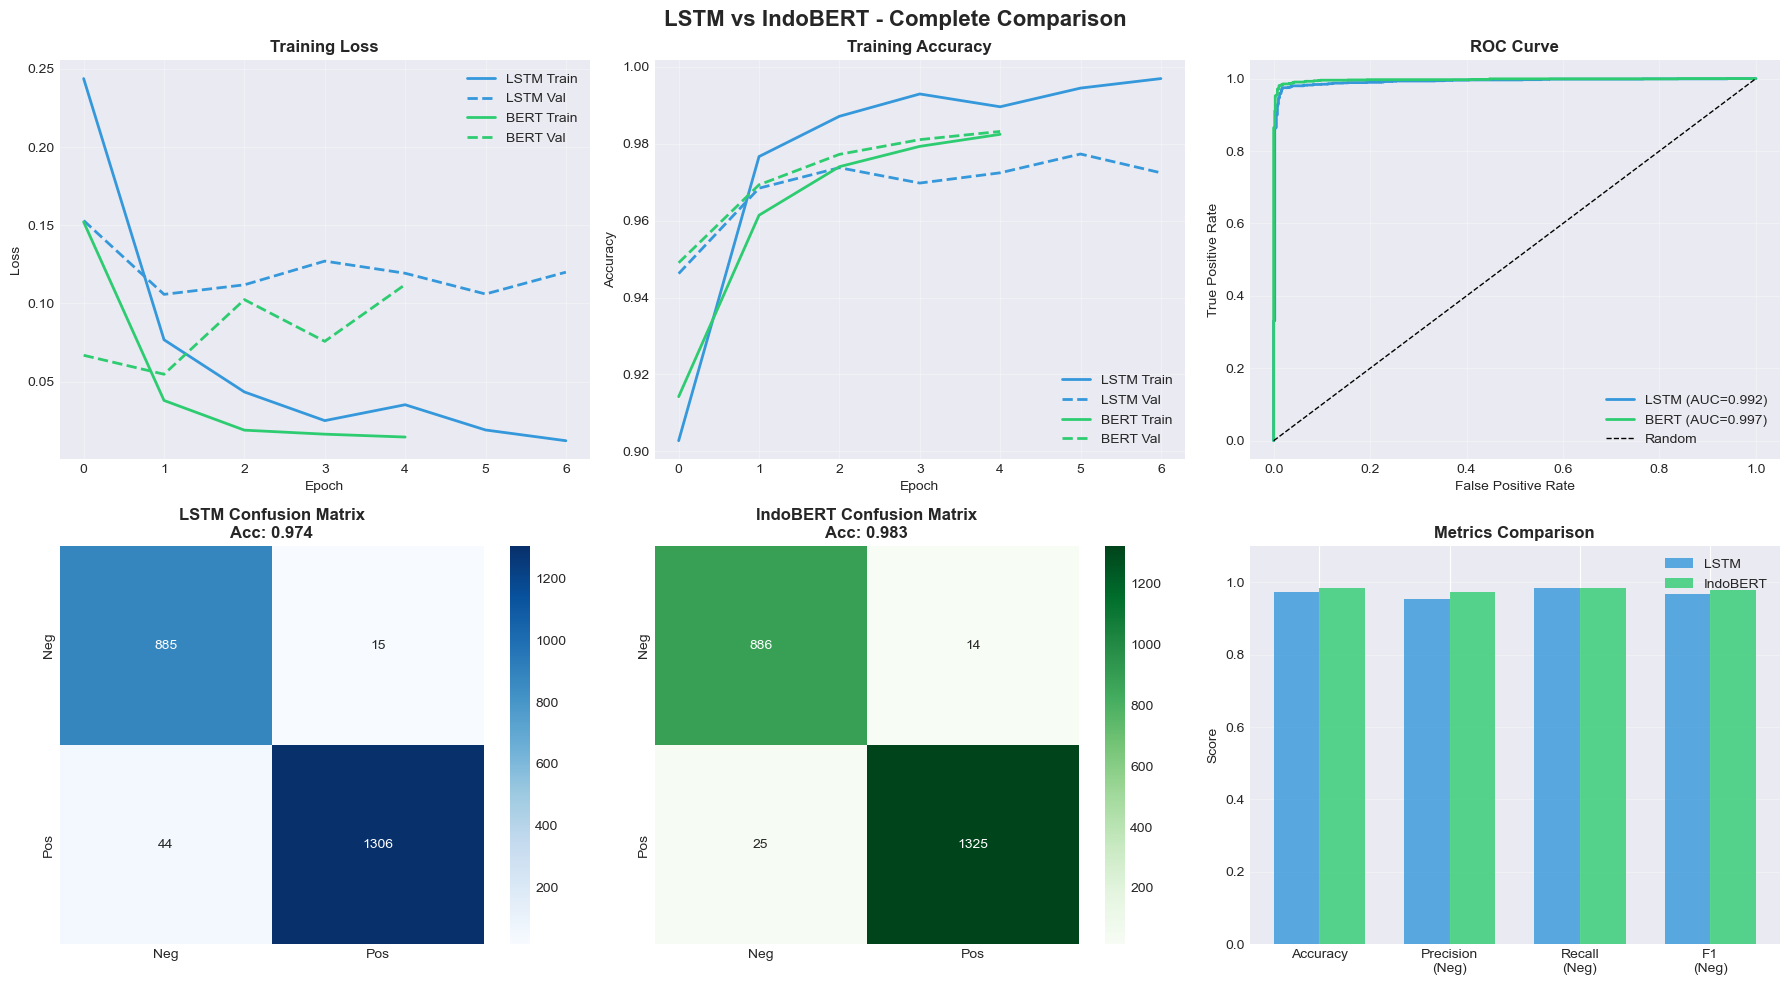

In [56]:
print("\n" + "="*80)
print("📊 STEP 7: MODEL COMPARISON")
print("="*80)

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('LSTM vs IndoBERT - Complete Comparison', fontsize=16, fontweight='bold')

# 1. Training History - Loss
axes[0, 0].plot(lstm_history.history['loss'], label='LSTM Train', linewidth=2, color='#3498db')
axes[0, 0].plot(lstm_history.history['val_loss'], label='LSTM Val', linewidth=2, color='#3498db', linestyle='--')
axes[0, 0].plot(bert_history.history['loss'], label='BERT Train', linewidth=2, color='#2ecc71')
axes[0, 0].plot(bert_history.history['val_loss'], label='BERT Val', linewidth=2, color='#2ecc71', linestyle='--')
axes[0, 0].set_title('Training Loss', fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Training History - Accuracy
axes[0, 1].plot(lstm_history.history['accuracy'], label='LSTM Train', linewidth=2, color='#3498db')
axes[0, 1].plot(lstm_history.history['val_accuracy'], label='LSTM Val', linewidth=2, color='#3498db', linestyle='--')
axes[0, 1].plot(bert_history.history['accuracy'], label='BERT Train', linewidth=2, color='#2ecc71')
axes[0, 1].plot(bert_history.history['val_accuracy'], label='BERT Val', linewidth=2, color='#2ecc71', linestyle='--')
axes[0, 1].set_title('Training Accuracy', fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. ROC Curve
axes[0, 2].plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC={roc_auc_lstm:.3f})', linewidth=2, color='#3498db')
axes[0, 2].plot(fpr_bert, tpr_bert, label=f'BERT (AUC={roc_auc_bert:.3f})', linewidth=2, color='#2ecc71')
axes[0, 2].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[0, 2].set_title('ROC Curve', fontweight='bold')
axes[0, 2].set_xlabel('False Positive Rate')
axes[0, 2].set_ylabel('True Positive Rate')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Confusion Matrix - LSTM
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
axes[1, 0].set_title(f'LSTM Confusion Matrix\nAcc: {lstm_report["accuracy"]:.3f}', fontweight='bold')

# 5. Confusion Matrix - IndoBERT
sns.heatmap(bert_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1, 1],
            xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
axes[1, 1].set_title(f'IndoBERT Confusion Matrix\nAcc: {bert_report["accuracy"]:.3f}', fontweight='bold')

# 6. Metrics Comparison
metrics = ['Accuracy', 'Precision\n(Neg)', 'Recall\n(Neg)', 'F1\n(Neg)']
lstm_vals = [lstm_report['accuracy'], lstm_report['Negative']['precision'],
             lstm_report['Negative']['recall'], lstm_report['Negative']['f1-score']]
bert_vals = [bert_report['accuracy'], bert_report['Negative']['precision'],
             bert_report['Negative']['recall'], bert_report['Negative']['f1-score']]

x = np.arange(len(metrics))
width = 0.35
axes[1, 2].bar(x - width/2, lstm_vals, width, label='LSTM', color='#3498db', alpha=0.8)
axes[1, 2].bar(x + width/2, bert_vals, width, label='IndoBERT', color='#2ecc71', alpha=0.8)
axes[1, 2].set_title('Metrics Comparison', fontweight='bold')
axes[1, 2].set_ylabel('Score')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(metrics)
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3, axis='y')
axes[1, 2].set_ylim([0, 1.1])

plt.tight_layout()
plt.savefig('3_complete_model_comparison.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: 3_complete_model_comparison.png")

In [57]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Neg)', 'Recall (Neg)', 'F1 (Neg)', 
               'Precision (Pos)', 'Recall (Pos)', 'F1 (Pos)', 'ROC-AUC'],
    'LSTM': [lstm_report['accuracy'], lstm_report['Negative']['precision'],
             lstm_report['Negative']['recall'], lstm_report['Negative']['f1-score'],
             lstm_report['Positive']['precision'], lstm_report['Positive']['recall'],
             lstm_report['Positive']['f1-score'], roc_auc_lstm],
    'IndoBERT': [bert_report['accuracy'], bert_report['Negative']['precision'],
                 bert_report['Negative']['recall'], bert_report['Negative']['f1-score'],
                 bert_report['Positive']['precision'], bert_report['Positive']['recall'],
                 bert_report['Positive']['f1-score'], roc_auc_bert]
})
comparison_df['Winner'] = comparison_df.apply(
    lambda row: 'IndoBERT' if row['IndoBERT'] > row['LSTM'] else ('LSTM' if row['LSTM'] > row['IndoBERT'] else 'Tie'),
    axis=1
)

print("\n" + "="*80)
print("📊 FINAL COMPARISON TABLE")
print("="*80)
print(comparison_df.to_string(index=False))

comparison_df.to_csv('model_comparison.csv', index=False)
print("\n✅ Saved: model_comparison.csv")

winner = 'IndoBERT' if bert_report['accuracy'] > lstm_report['accuracy'] else 'LSTM'
acc_diff = abs(bert_report['accuracy'] - lstm_report['accuracy']) * 100


📊 FINAL COMPARISON TABLE
         Metric     LSTM  IndoBERT   Winner
       Accuracy 0.973778  0.982667 IndoBERT
Precision (Neg) 0.952637  0.972558 IndoBERT
   Recall (Neg) 0.983333  0.984444 IndoBERT
       F1 (Neg) 0.967742  0.978465 IndoBERT
Precision (Pos) 0.988645  0.989544 IndoBERT
   Recall (Pos) 0.967407  0.981481 IndoBERT
       F1 (Pos) 0.977911  0.985496 IndoBERT
        ROC-AUC 0.992133  0.996984 IndoBERT

✅ Saved: model_comparison.csv
